In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings

# Suppress SettingWithCopyWarning
warnings.filterwarnings("ignore")
# Improve graph quality
plt.rcParams['figure.dpi'] = 200
# See all columns
pd.set_option('display.max_columns', None)

In [2]:
# Load the data
df = pd.read_csv('C:/Users/Marcos/Desktop/Balotage/ResultadosElectorales_2023_SegundaVuelta.csv')

## Información del Dataset


<hr>

In [3]:
df.head()

,año,eleccion_tipo,eleccion_id,recuento_id,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,circuito_nombre,mesa_id,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad,estado_final
0,2023,SEGUNDA VUELTA,3,1,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,1,Comuna 01,1,1,1,NATIVOS,345,1,PRESIDENTE Y VICE,134.0,UNION POR LA PATRIA,NaN,NaN,POSITIVO,135,ESCRUTADO
1,2023,SEGUNDA VUELTA,3,1,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,1,Comuna 01,1,1,1,NATIVOS,345,1,PRESIDENTE Y VICE,135.0,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,95,ESCRUTADO
2,2023,SEGUNDA VUELTA,3,1,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,1,Comuna 01,1,1,1,NATIVOS,345,1,PRESIDENTE Y VICE,NaN,NaN,NaN,NaN,EN BLANCO,3,ESCRUTADO
3,2023,SEGUNDA VUELTA,3,1,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,1,Comuna 01,1,1,1,NATIVOS,345,1,PRESIDENTE Y VICE,NaN,NaN,NaN,NaN,NULO,3,ESCRUTADO
4,2023,SEGUNDA VUELTA,3,1,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,1,Comuna 01,1,1,1,NATIVOS,345,1,PRESIDENTE Y VICE,NaN,NaN,NaN,NaN,IMPUGNADO,0,ESCRUTADO


In [4]:
df.columns.tolist()

['año',
 'eleccion_tipo',
 'eleccion_id',
 'recuento_id',
 'recuento_tipo',
 'padron_tipo',
 'distrito_id',
 'distrito_nombre',
 'seccionprovincial_id',
 'seccionprovincial_nombre',
 'seccion_id',
 'seccion_nombre',
 'circuito_id',
 'circuito_nombre',
 'mesa_id',
 'mesa_tipo',
 'mesa_electores',
 'cargo_id',
 'cargo_nombre',
 'agrupacion_id',
 'agrupacion_nombre',
 'lista_numero',
 'lista_nombre',
 'votos_tipo',
 'votos_cantidad',
 'estado_final']

In [5]:
df.shape

(627120, 26)

In [6]:
df.isna().sum()

año                              0
eleccion_tipo                    0
eleccion_id                      0
recuento_id                      0
recuento_tipo                    0
padron_tipo                      0
distrito_id                      0
distrito_nombre                  0
seccionprovincial_id        349020
seccionprovincial_nombre    349020
seccion_id                       0
seccion_nombre                   0
circuito_id                      0
circuito_nombre                  0
mesa_id                          0
mesa_tipo                        0
mesa_electores                   0
cargo_id                         0
cargo_nombre                     0
agrupacion_id               418080
agrupacion_nombre           418080
lista_numero                627120
lista_nombre                627120
votos_tipo                       0
votos_cantidad                   0
estado_final                     0
dtype: int64

In [3]:
df_presidente = df.copy()
df_presidente['id_mesa'] = df_presidente['distrito_id'].astype(str)+'-'+df_presidente['seccion_id'].astype(str)+'-'+df_presidente['circuito_id'].astype(str)+'-'+df_presidente['mesa_id'].astype(str)
# In the oficial webpage of the government it says that the total number of "mesas" were 104520, so let's check we have the same number
len(df_presidente['id_mesa'].unique())

104521

In [4]:
df_presidente_dep = df_presidente.drop(['año',
                          'eleccion_tipo',
                          'recuento_tipo',
                          'padron_tipo',
                          'seccionprovincial_nombre',
                          'seccion_nombre',
                          'mesa_tipo',
                          'circuito_nombre',
                          'seccionprovincial_id',
                          'circuito_id',
                          'mesa_id',
                          'seccion_id',
                          'cargo_id',
                          'lista_numero',
                          'lista_nombre',
                          'cargo_nombre',
                          'distrito_id',
                          ],
                         axis = 1)
df_presidente_dep = df_presidente_dep[['distrito_nombre','id_mesa','mesa_electores','agrupacion_nombre','agrupacion_id','votos_tipo','votos_cantidad']]
df_presidente_dep = df_presidente_dep.sort_values(['distrito_nombre','id_mesa']).reset_index(drop=True)
df_presidente_dep.head()

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad
0,Buenos Aires,2-1-00001-1,350,LA LIBERTAD AVANZA,135.0,POSITIVO,159
1,Buenos Aires,2-1-00001-1,350,UNION POR LA PATRIA,134.0,POSITIVO,92
2,Buenos Aires,2-1-00001-1,350,NaN,NaN,EN BLANCO,4
3,Buenos Aires,2-1-00001-1,350,NaN,NaN,NULO,7
4,Buenos Aires,2-1-00001-1,350,NaN,NaN,IMPUGNADO,0


## Resultado de las elecciones

<hr>

### Cuantos votos obtuvo cada agrupación?

In [6]:
agrupation_votes = df_presidente_dep.groupby('agrupacion_nombre')['votos_cantidad'].sum().reset_index()
agrupation_votes = agrupation_votes.sort_values('votos_cantidad', ascending=False)
# Total votes that voted an agrupation
total_votes = agrupation_votes['votos_cantidad'].sum()
agrupation_votes

,agrupacion_nombre,votos_cantidad
0,LA LIBERTAD AVANZA,14476462
1,UNION POR LA PATRIA,11516142


### Resultado de las Elecciones

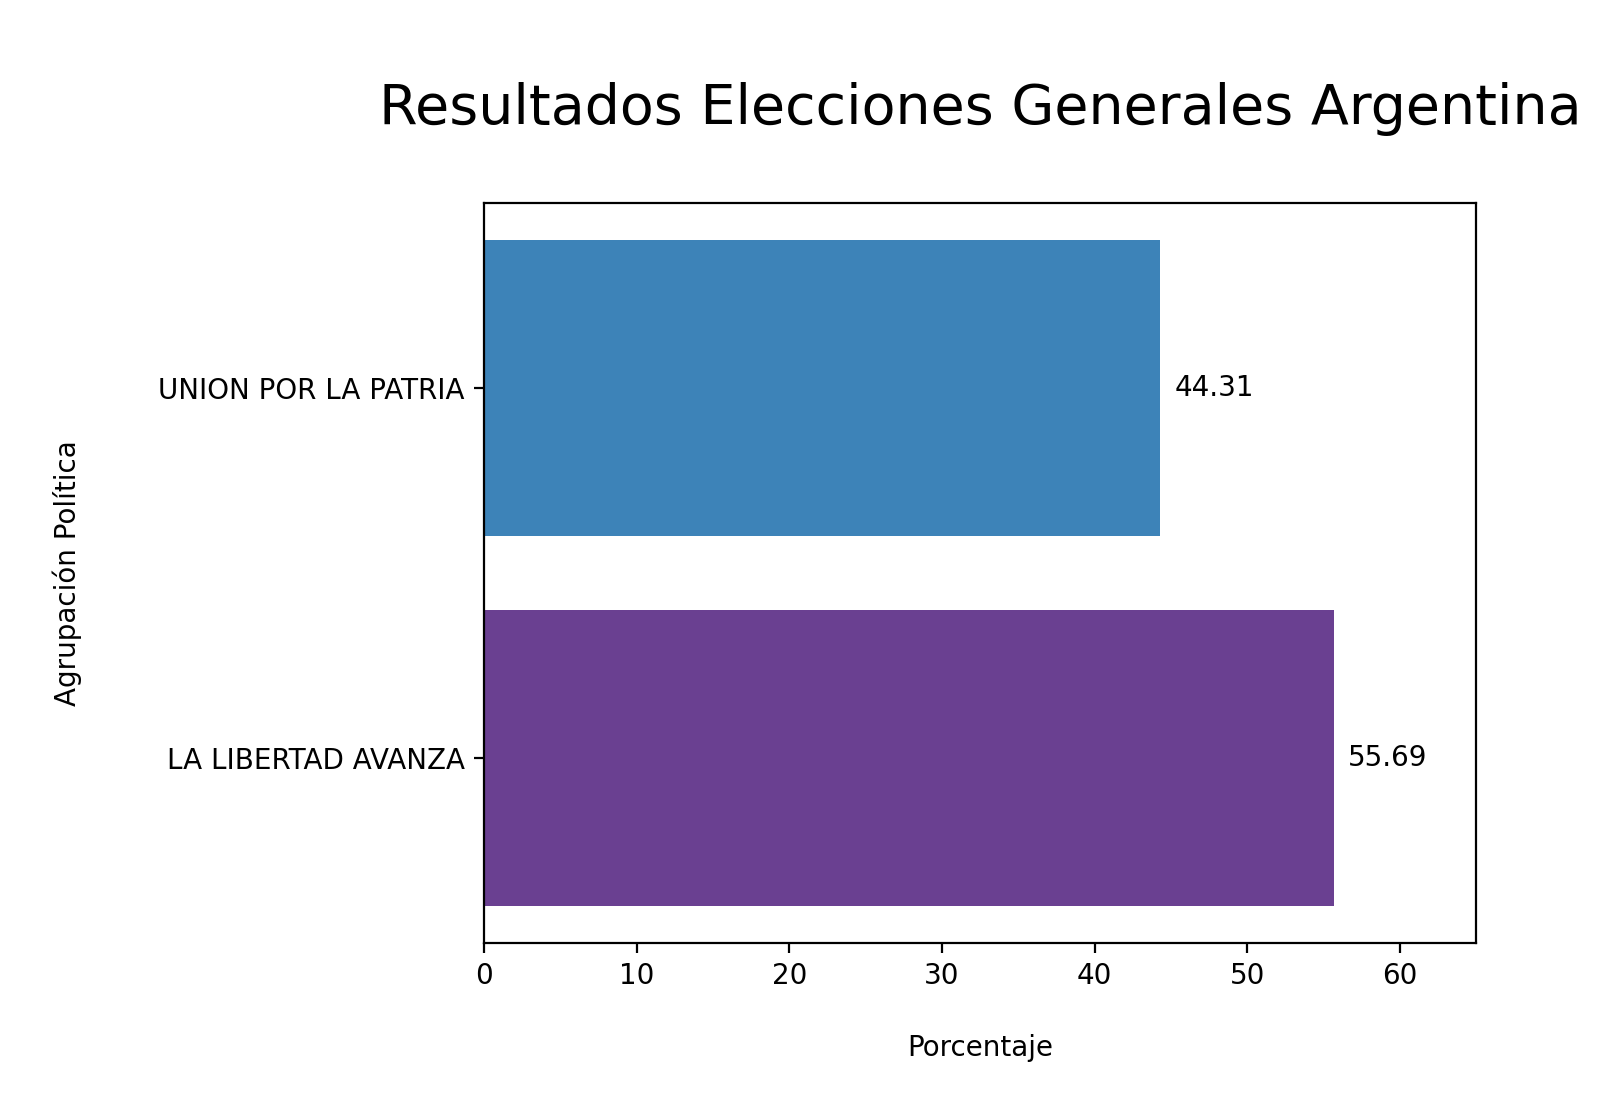

In [7]:
# Each agrupation has a specific colour
custom_palette = sns.color_palette(['#2986CC', '#6A329F'])

results = df_presidente_dep[['agrupacion_nombre','votos_cantidad']]
results = round(results.groupby('agrupacion_nombre')['votos_cantidad'].sum().div(total_votes/100,axis=0),2)
results = results.reset_index().sort_values(['agrupacion_nombre'], ascending=False)

chart = sns.barplot(data=results, x='votos_cantidad', y='agrupacion_nombre', palette=custom_palette)
chart.bar_label(chart.containers[0], fontsize=10, padding=5)

plt.title('\nResultados Elecciones Generales Argentina\n', fontsize=20)
plt.xlabel('\nPorcentaje\n')
plt.ylabel('\nAgrupación Política\n\n')
plt.xlim(0,65)

plt.show()

### ¿Y qué hay sobre la cantidad de votos que cada Provincia aportó a la elección?

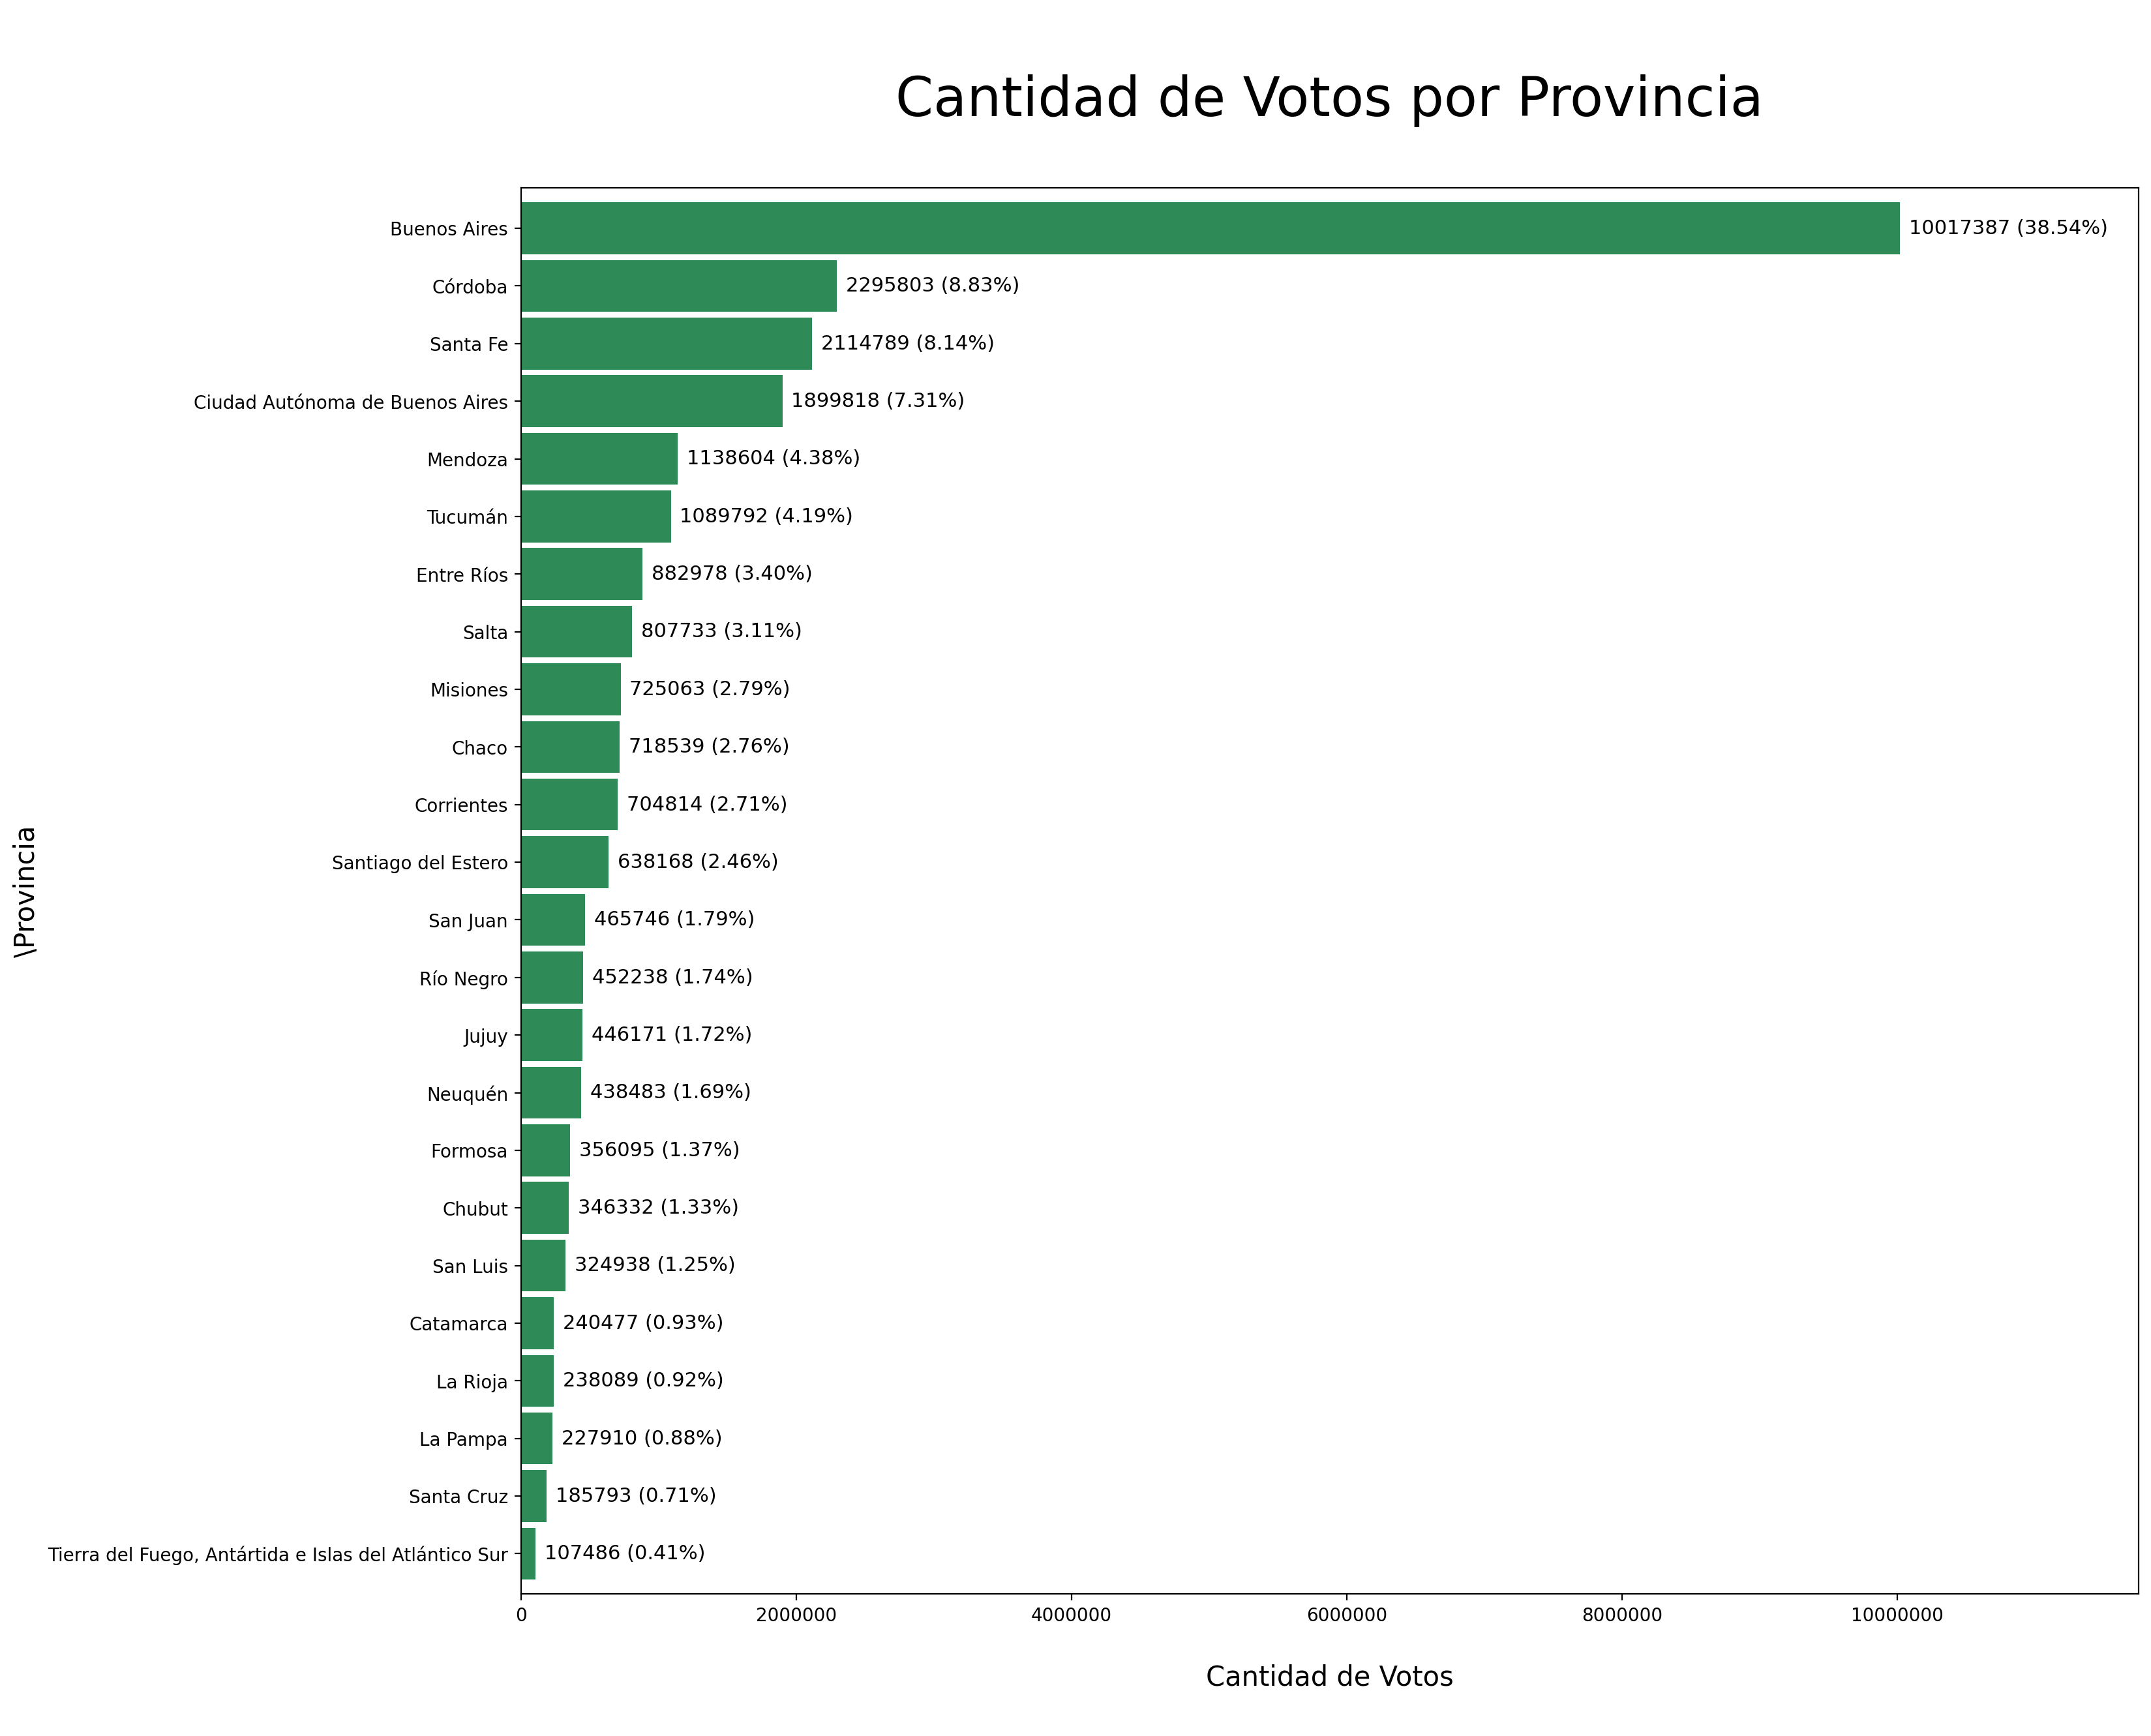

Cantidad de votos en todo el país: 26863246


In [16]:
result = df_presidente_dep.groupby('distrito_nombre')['votos_cantidad'].sum().reset_index()
result = result.set_index(['distrito_nombre'])
result = result.sort_values(['votos_cantidad'],ascending=True)

chart = result.plot(kind='barh', figsize=(16, 14), width=0.9, color='seagreen')
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{val} ({val/total_votes*100:.2f}%)' for val in container.datavalues])
    
plt.title('\nCantidad de Votos por Provincia\n', fontsize=30)
plt.xlabel('\nCantidad de Votos\n', fontsize=15)
plt.ylabel('\Provincia', fontsize=15)
plt.ticklabel_format(axis="x", style="plain")
chart.set_xlim(0, 11750000)

plt.legend().set_visible(False)
plt.show()

total_votes = result['votos_cantidad'].sum()
print('Cantidad de votos en todo el país:', total_votes)

### ¿Qué porcentaje obtuvo cada agrupación en cada provincia y también cuántos puntos obtuvo la agrupación en esa provincia?

In [8]:
def colores_jxc(df):
    colors = sns.color_palette("YlOrBr", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2 + 4
    custom_palette = colors[start_index:]
    return custom_palette

def colores_lla(df):
    colors = sns.color_palette("ch:s=-.2,r=.6", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2
    custom_palette = colors[start_index:]
    return custom_palette

def colores_upp(df):
    colors = sns.color_palette("Blues", n_colors=2*len(df.columns))
    start_index = len(df.columns)//2 + 4
    custom_palette = colors[start_index:]
    return custom_palette

## Resultados por agrupación


<hr>

In [9]:
pd.options.display.float_format = '{:.2f}'.format

results = df_presidente_dep[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results = round(results.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)

votes_province = results.sum(axis=1).reset_index().sort_values(0, ascending=True)
votes_province_index = votes_province.iloc[:,0].tolist()

results = results.loc[votes_province_index]
results_index = results.reset_index().index.tolist()
for provincia in results_index:
    results.iloc[provincia,:] = round(results.iloc[provincia,:].div(results.iloc[provincia,:].sum(axis=0),axis=0),4)*100
results.sort_values('LA LIBERTAD AVANZA', ascending=False)

agrupacion_nombre,LA LIBERTAD AVANZA,UNION POR LA PATRIA
distrito_nombre,,
Córdoba,74.05,25.95
Mendoza,71.15,28.85
San Luis,67.99,32.01
Santa Fe,62.82,37.18
Entre Ríos,61.48,38.52
San Juan,60.68,39.32
Neuquén,60.42,39.58
Chubut,59.11,40.89
Jujuy,58.33,41.67


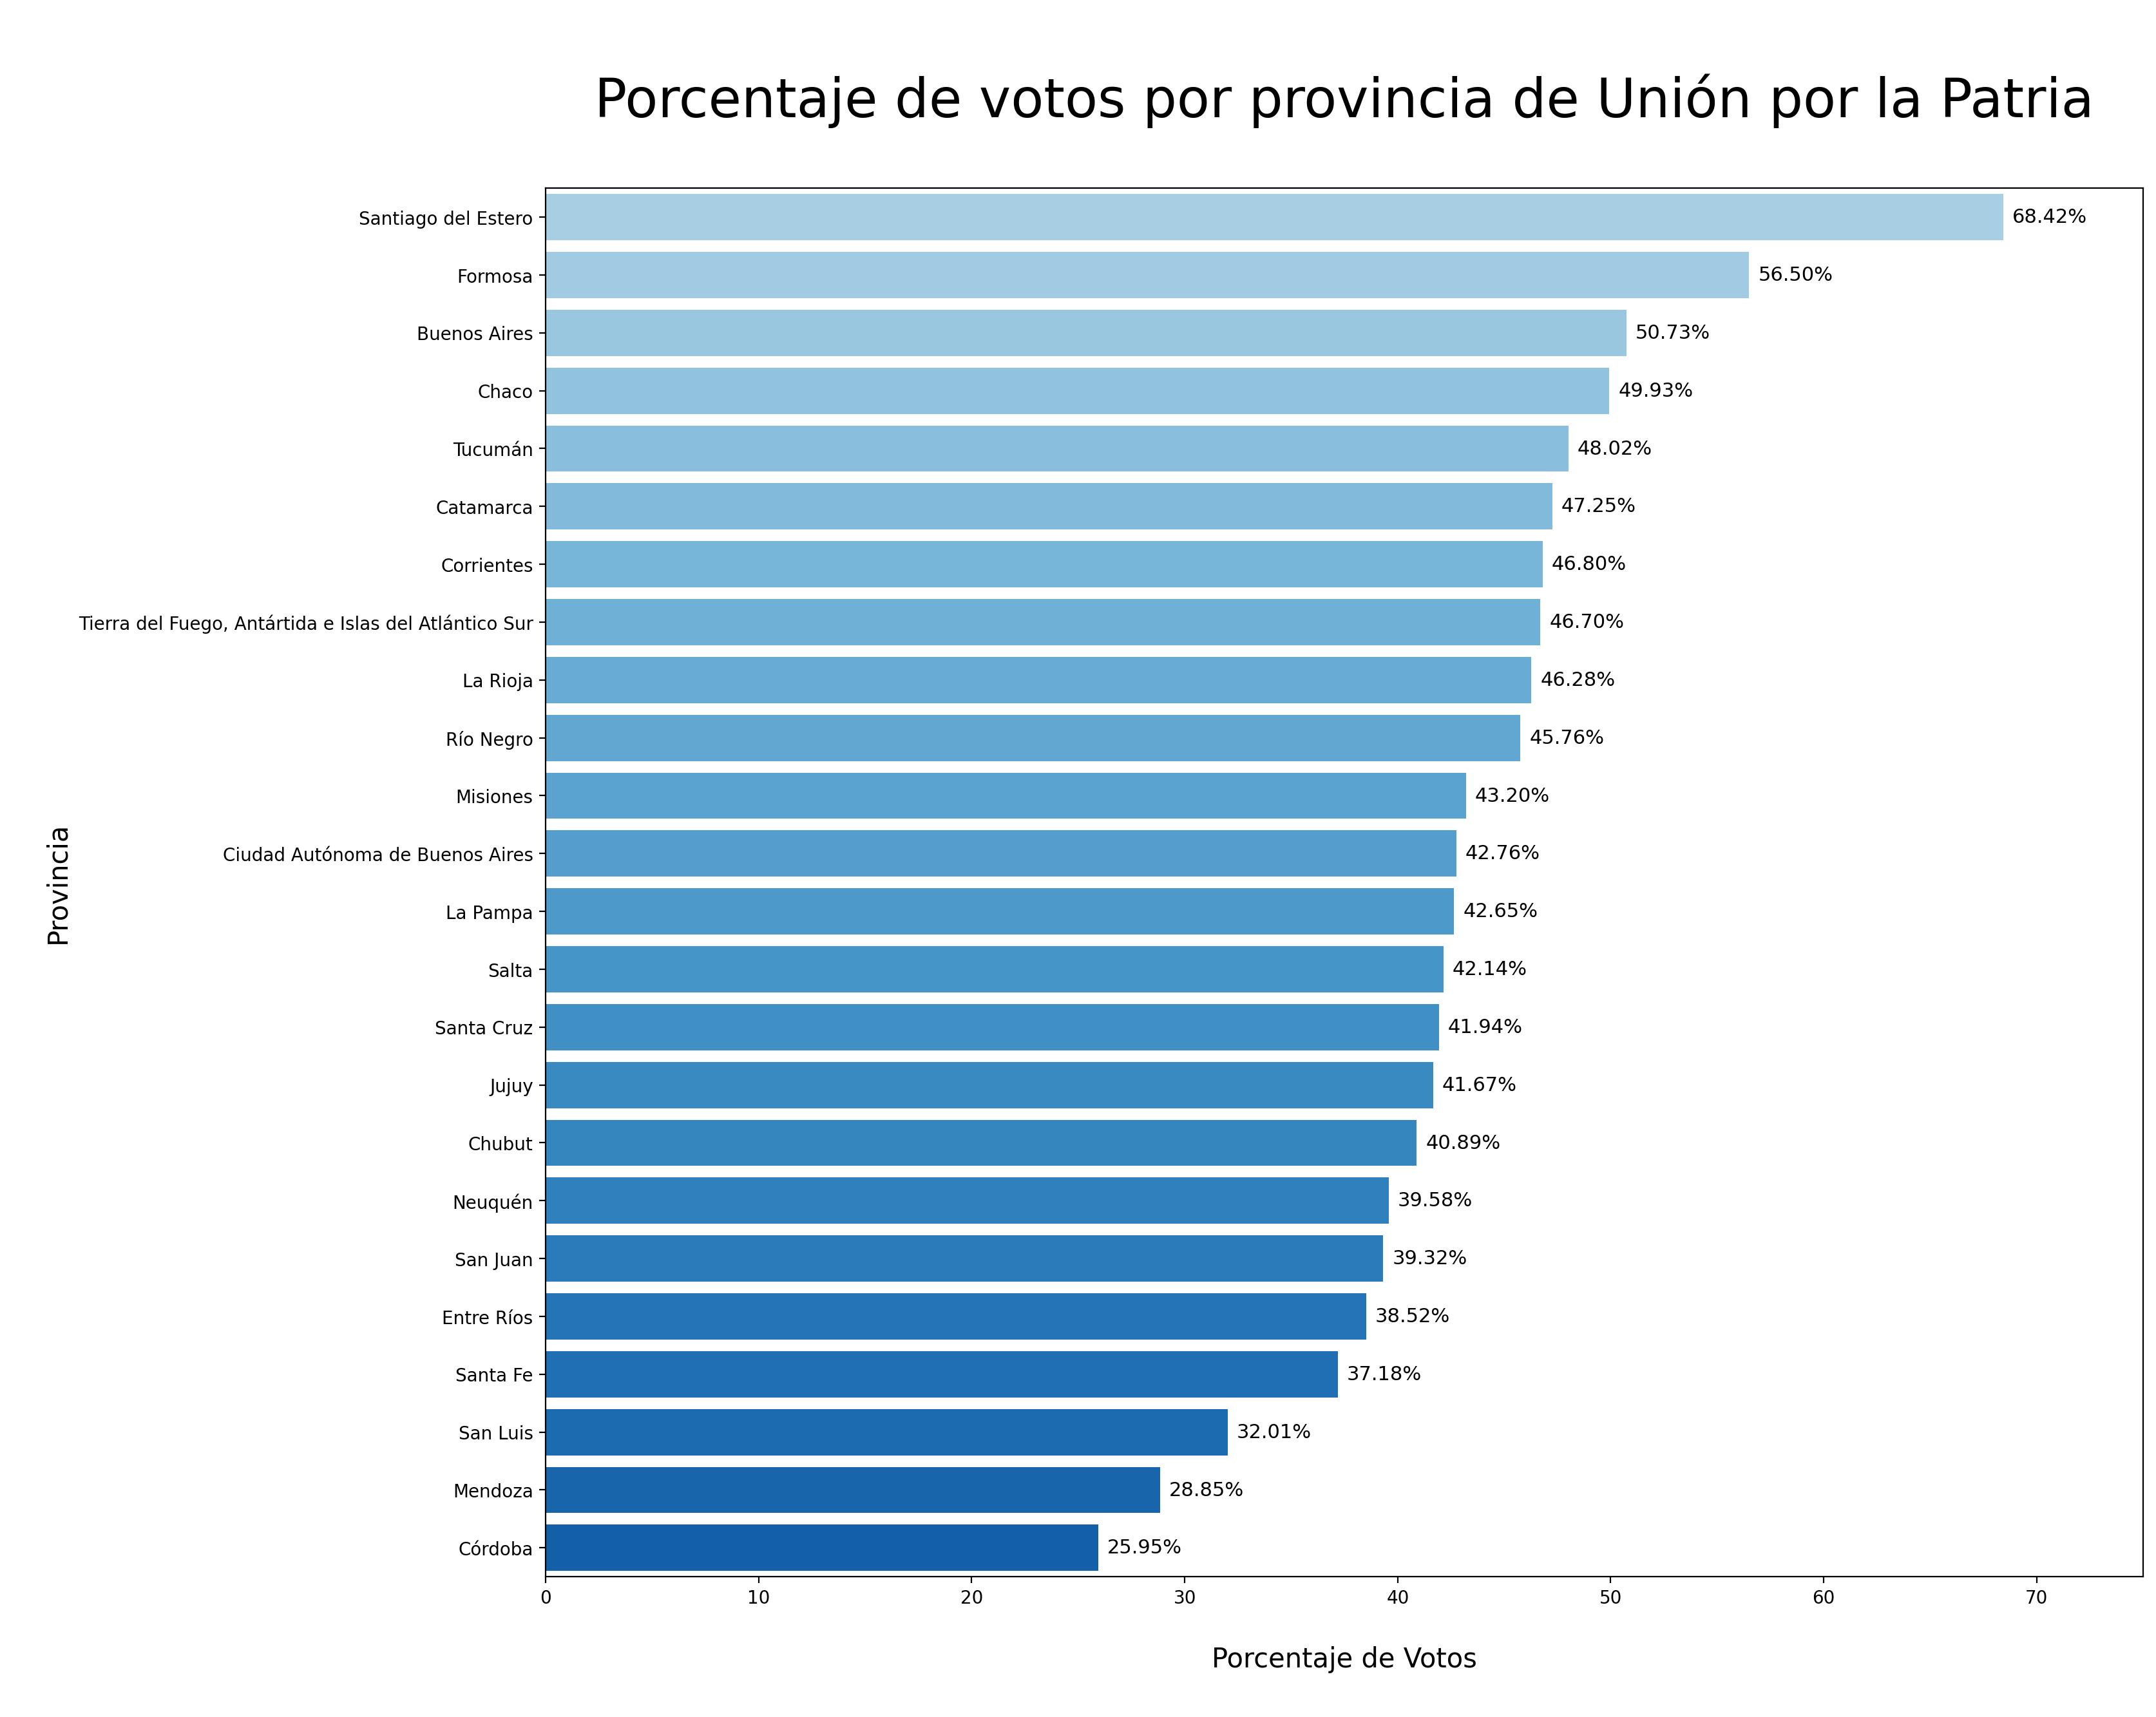

In [10]:
results_upp = results['UNION POR LA PATRIA'].reset_index().set_index('distrito_nombre').sort_values('UNION POR LA PATRIA',ascending=False)
index_upp = results_upp.index.tolist()
results_upp = results_upp.T

custom_palette = colores_upp(results_upp)
plt.figure(figsize=(16, 14))
chart = sns.barplot(data=results_upp, orient='h', palette=custom_palette, saturation=1)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\nPorcentaje de votos por provincia de Unión por la Patria\n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia', fontsize=15)
chart.set_xlim(0, 75)

plt.show()

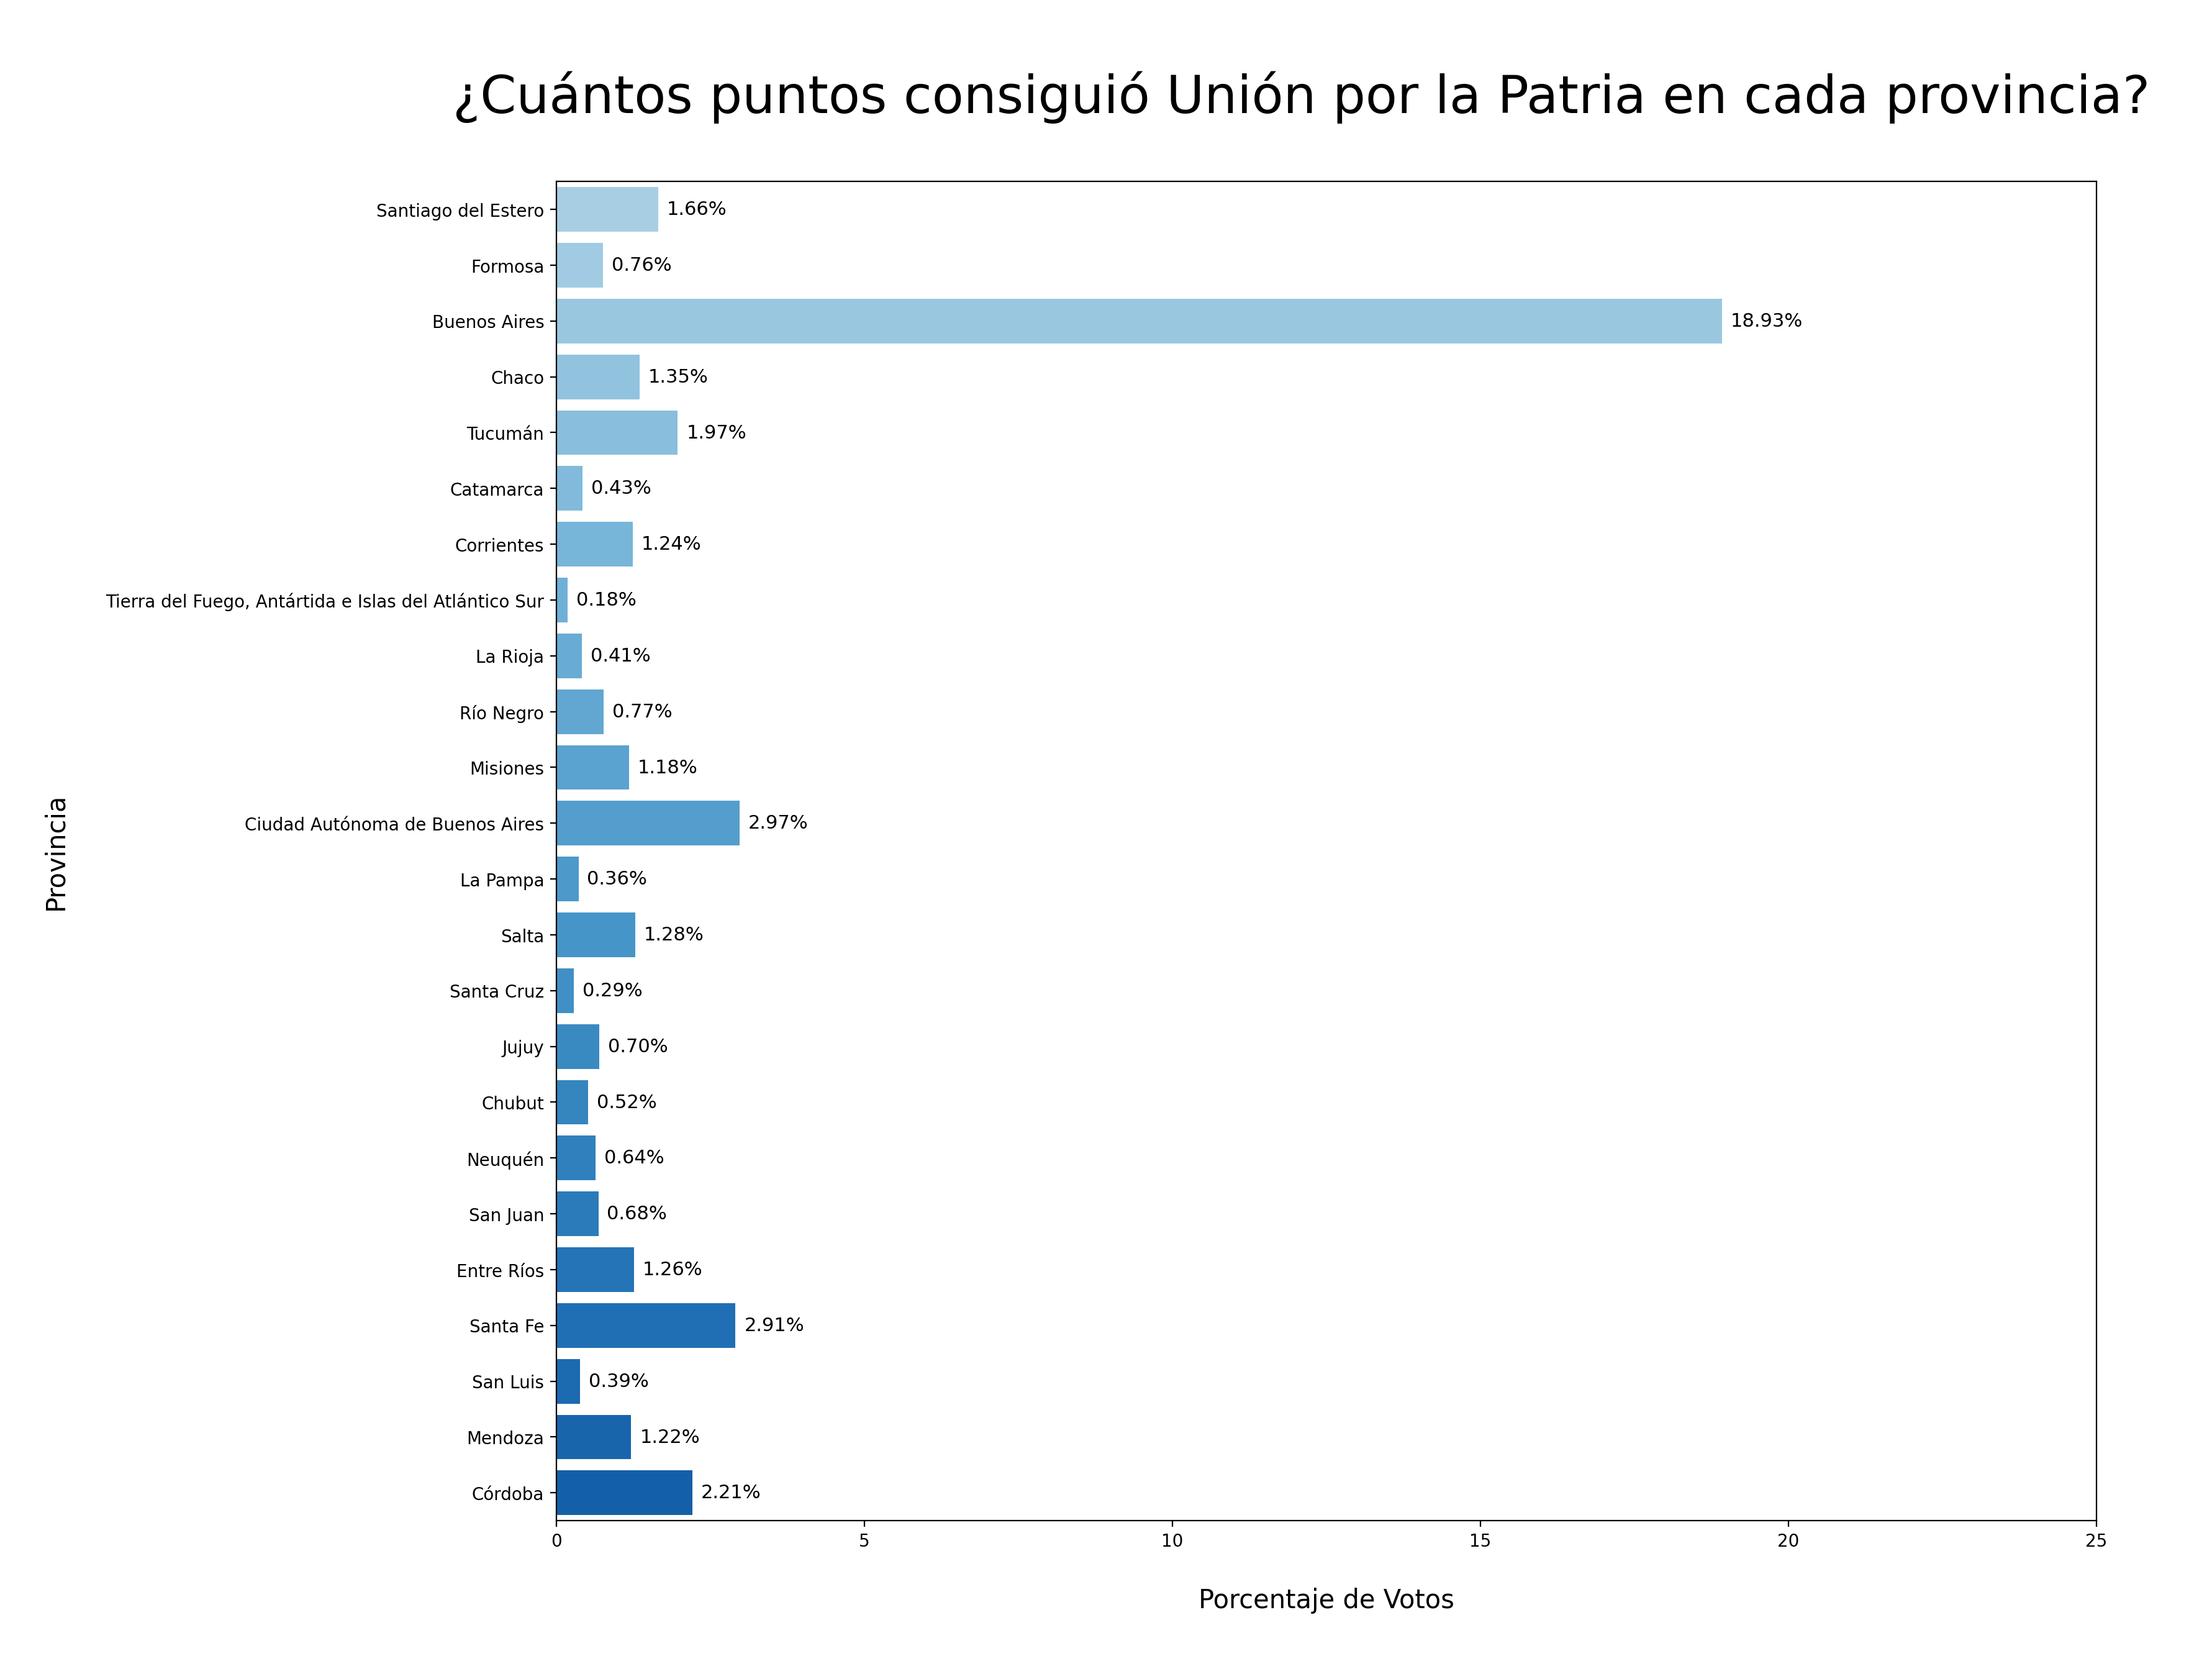

In [11]:
results_1 = df_presidente_dep[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results_1 = round(results_1.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)
results_upp = results_1['UNION POR LA PATRIA'].reset_index().set_index('distrito_nombre').sort_values('UNION POR LA PATRIA',ascending=False)
results_upp = round(results_upp.div(results_1.sum().sum())*100,3)
results_upp = results_upp.T

custom_palette = colores_upp(results_upp)
plt.figure(figsize=(16, 14))
chart = sns.barplot(data=results_upp, orient='h', palette=custom_palette, saturation=1, order = index_upp)
chart.set_xlim(0,25)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió Unión por la Patria en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)
plt.show()

### La Libertad Avanza

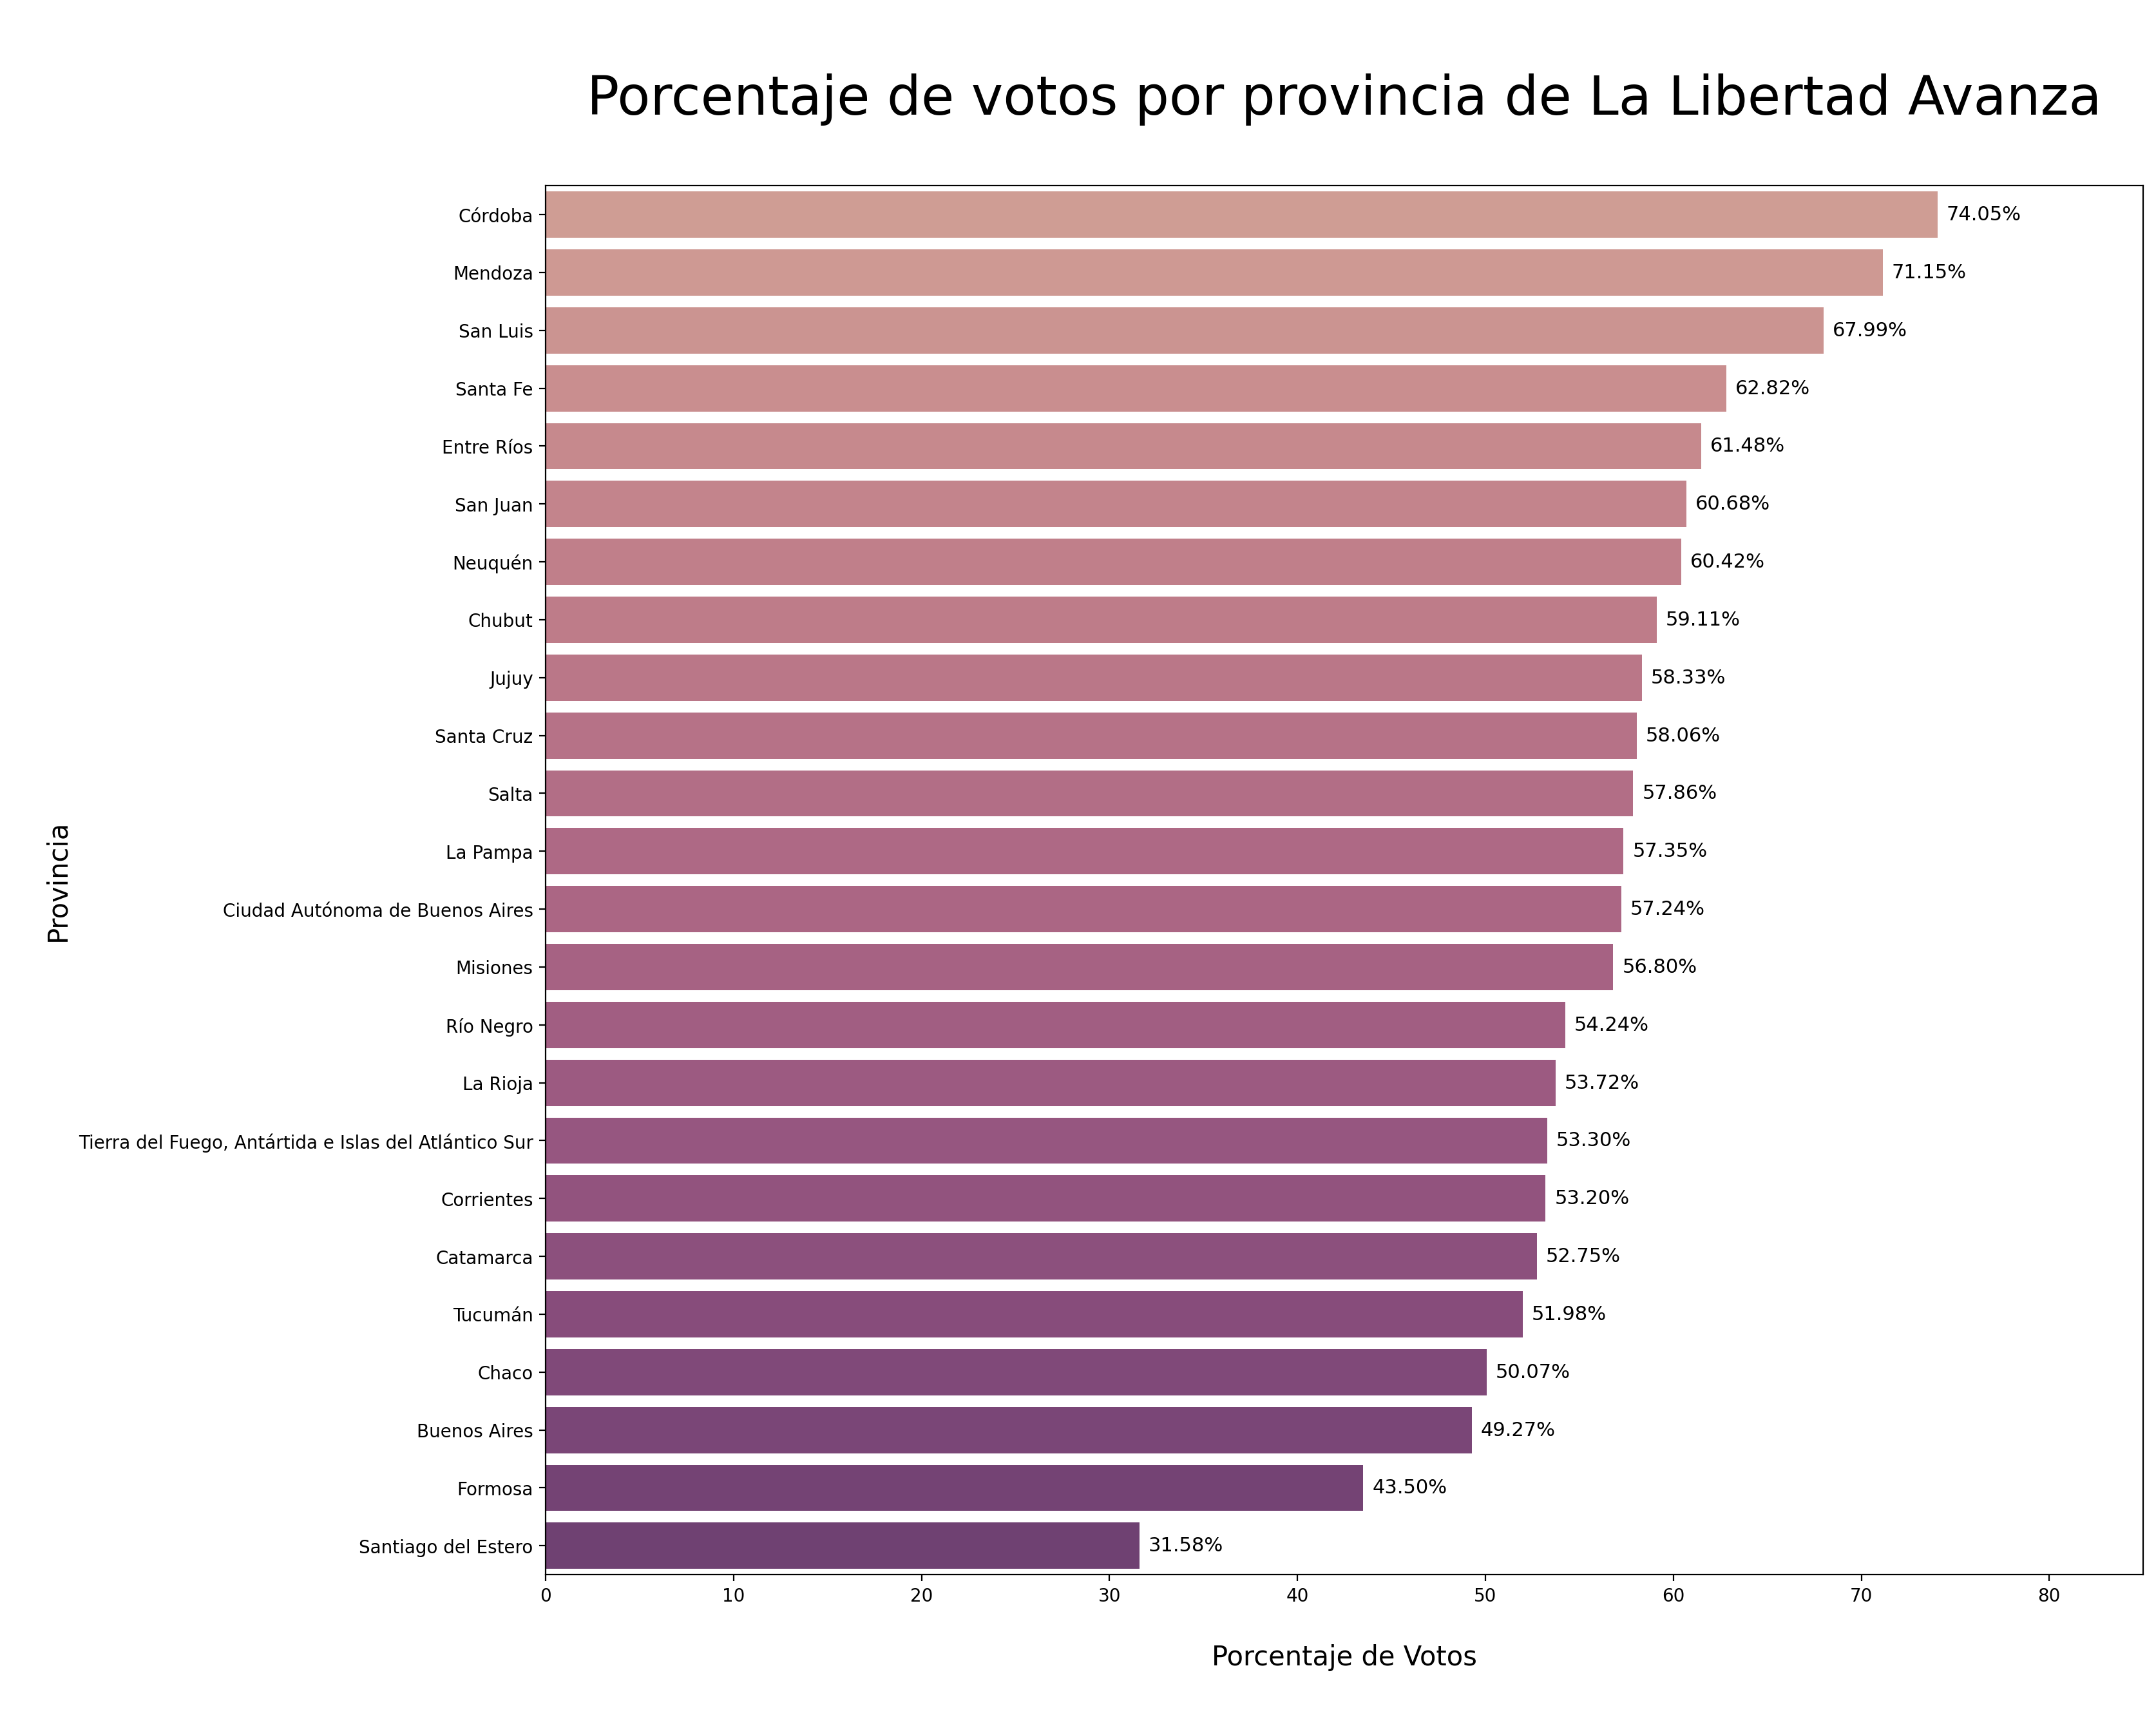

In [12]:
results_lla = results['LA LIBERTAD AVANZA'].reset_index().set_index('distrito_nombre').sort_values('LA LIBERTAD AVANZA',ascending=False)
index_lla = results_lla.index.tolist()
results_lla = results_lla.T

custom_palette = colores_lla(results_lla)
plt.figure(figsize=(16, 14))
chart = sns.barplot(data=results_lla, orient='h', palette=custom_palette, saturation=1)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\nPorcentaje de votos por provincia de La Libertad Avanza\n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia', fontsize=15)
chart.set_xlim(0, 85)

plt.show()

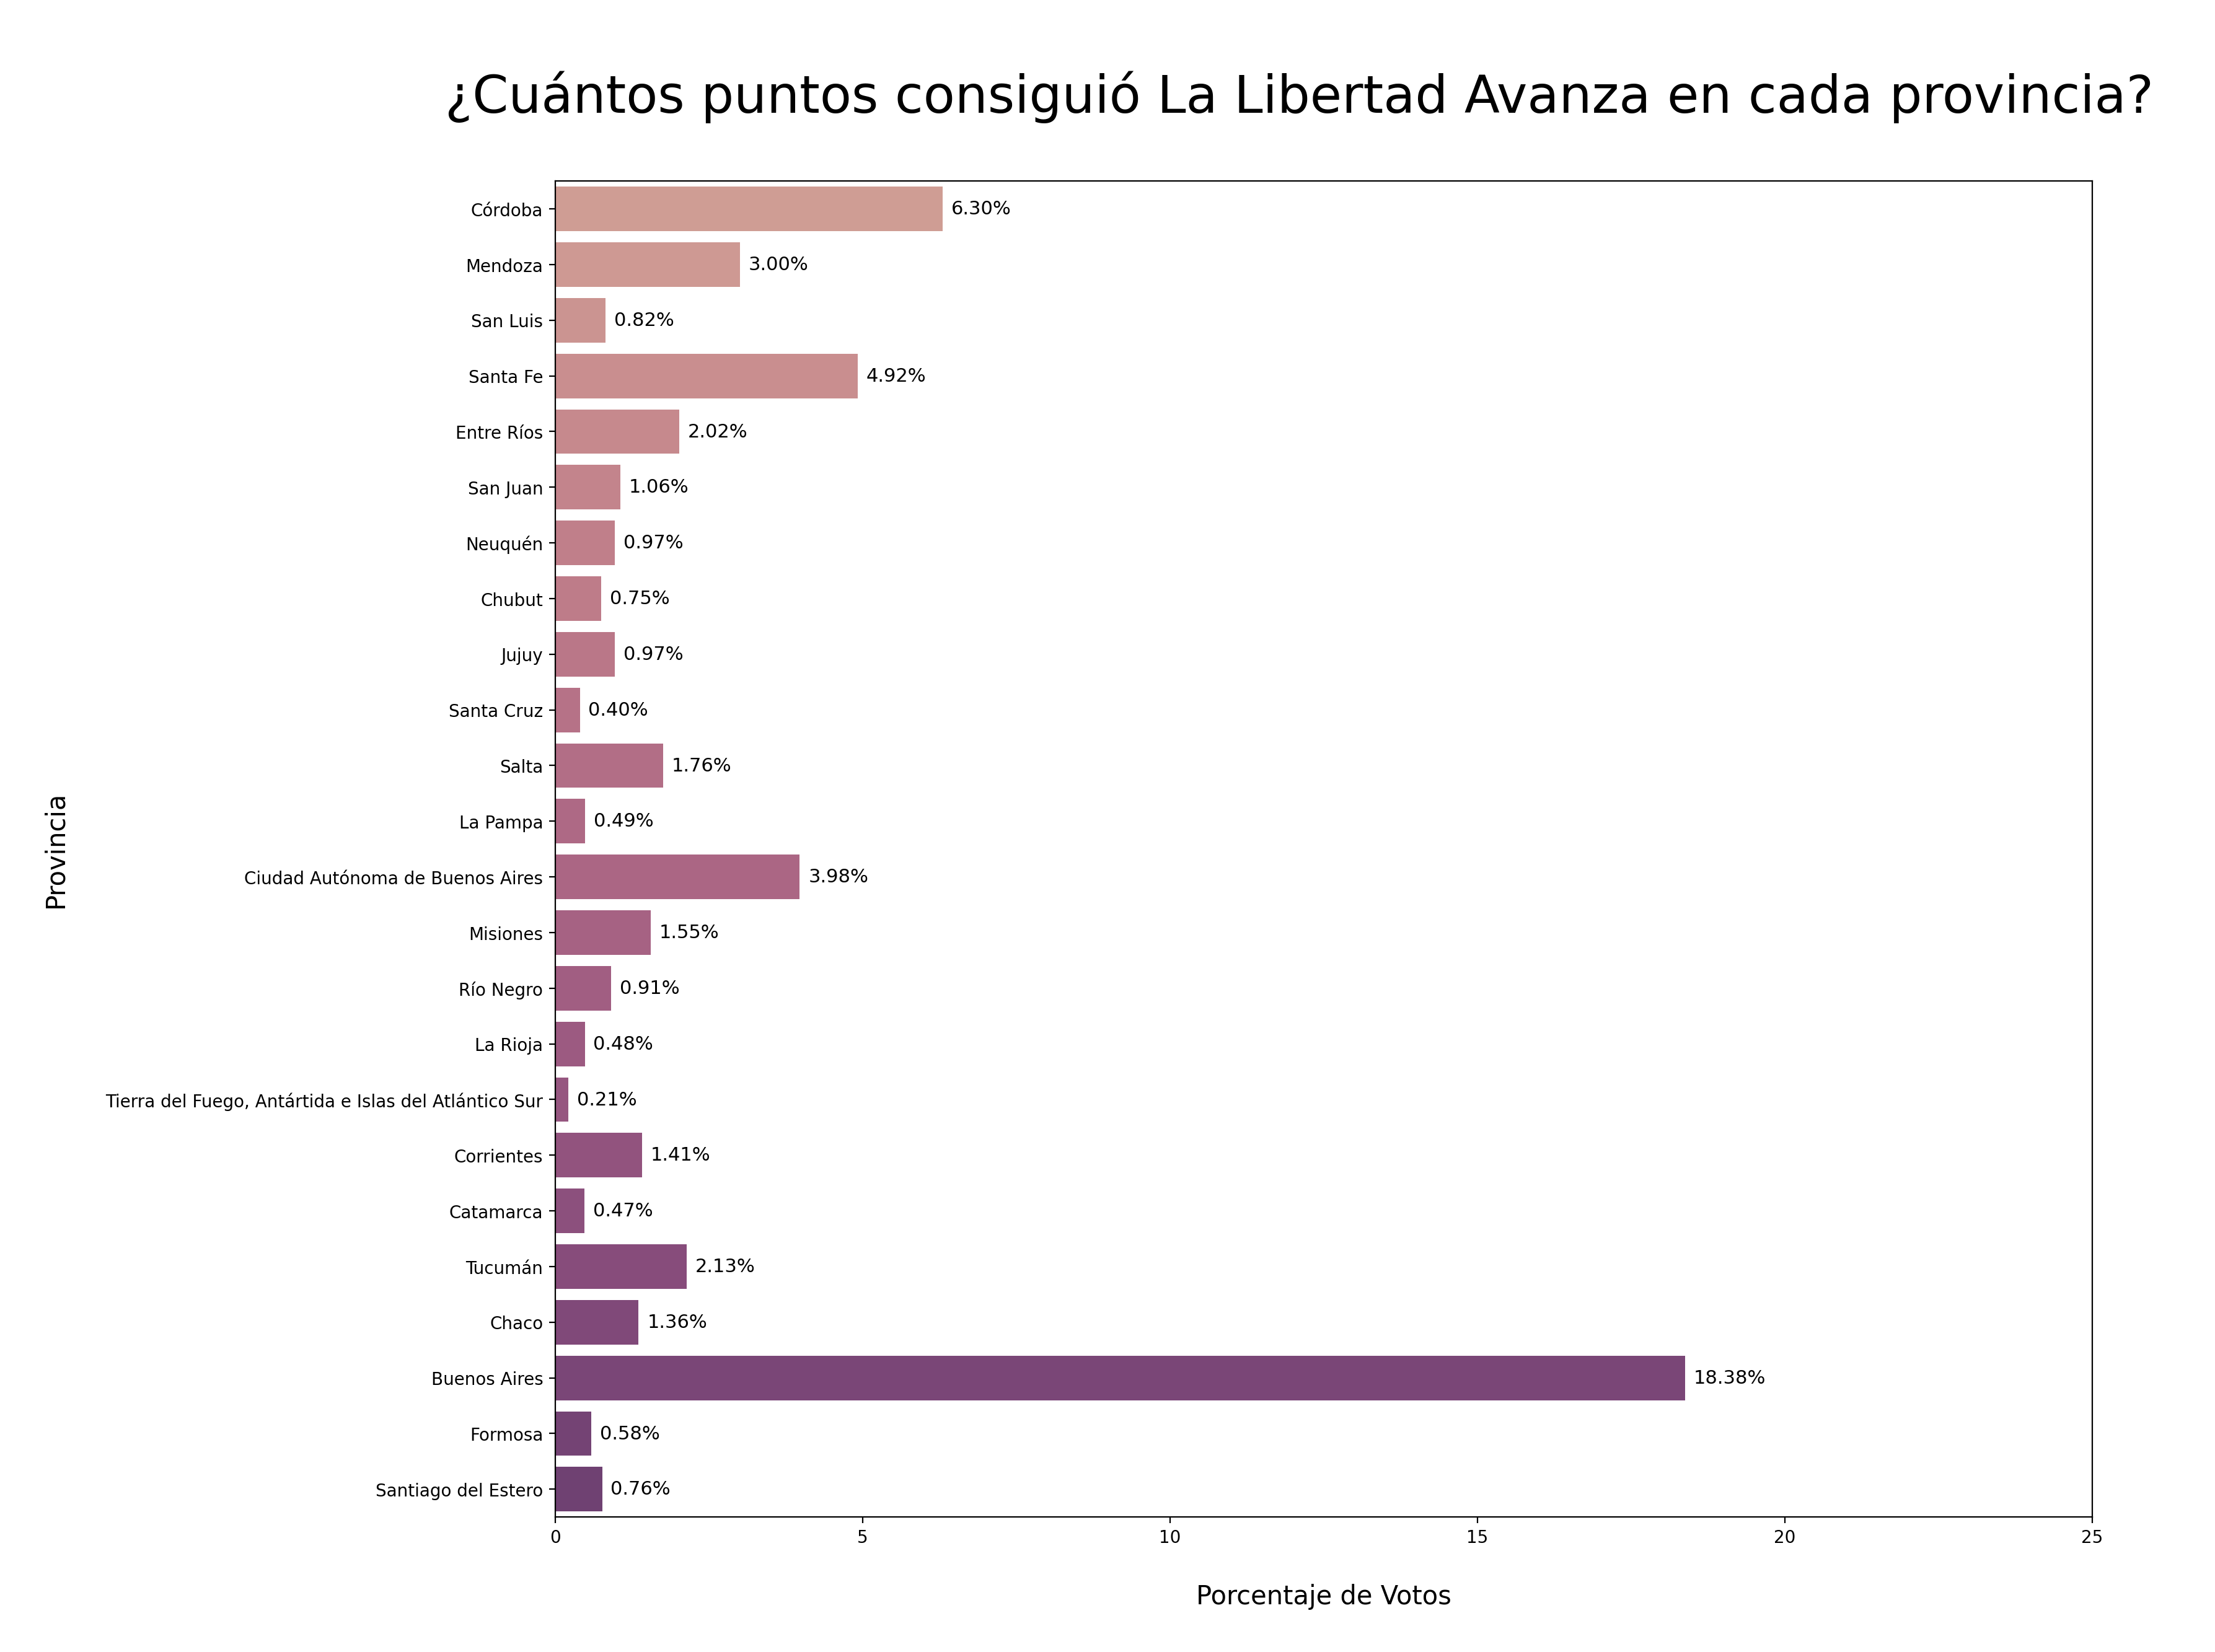

In [14]:
results_3 = df_presidente_dep[['distrito_nombre','agrupacion_nombre','votos_cantidad']]
results_3 = round(results_3.groupby(['distrito_nombre','agrupacion_nombre'])['votos_cantidad'].sum().unstack(fill_value=0),3)
results_lla = results_3['LA LIBERTAD AVANZA'].reset_index().set_index('distrito_nombre').sort_values('LA LIBERTAD AVANZA',ascending=False)
results_lla = round(results_lla.div(results_3.sum().sum())*100,3)
results_lla = results_lla.T

custom_palette = colores_lla(results_lla)
plt.figure(figsize=(16, 14))
chart = sns.barplot(data=results_lla, orient='h', palette=custom_palette, saturation=1, order = index_lla)
chart.set_xlim(0,25)
for container in chart.containers:
    chart.bar_label(container, fontsize=11, padding=5, labels=[f'{float(val):.2f}%' for val in container.datavalues])

chart.set_title('\n¿Cuántos puntos consiguió La Libertad Avanza en cada provincia?   \n', fontsize=30)
chart.set_xlabel('\nPorcentaje de Votos\n', fontsize=15)
chart.set_ylabel('\nProvincia\n', fontsize=15)
plt.show()

## Distribución de los resultados por agrupación


<hr>

Creemos una columna que muestre el porcentaje que cada agrupación obtuvo en cada mesa.

In [9]:
df_presidente_percen = df_presidente_dep.copy()
df_presidente_percen['votos_porcentaje'] = round(df_presidente_percen.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)
df_mesas_porcen = df_presidente_percen[~df_presidente_percen['agrupacion_nombre'].isin(['FRENTE DE IZQUIERDA', 'HACEMOS POR NUESTRO PAIS'])]
df_mesas_porcen.head()

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad,votos_porcentaje
0,Buenos Aires,2-1-00001-1,350,LA LIBERTAD AVANZA,135.0,POSITIVO,159,60.69
1,Buenos Aires,2-1-00001-1,350,UNION POR LA PATRIA,134.0,POSITIVO,92,35.11
2,Buenos Aires,2-1-00001-1,350,NaN,NaN,EN BLANCO,4,1.53
3,Buenos Aires,2-1-00001-1,350,NaN,NaN,NULO,7,2.67
4,Buenos Aires,2-1-00001-1,350,NaN,NaN,IMPUGNADO,0,0.00


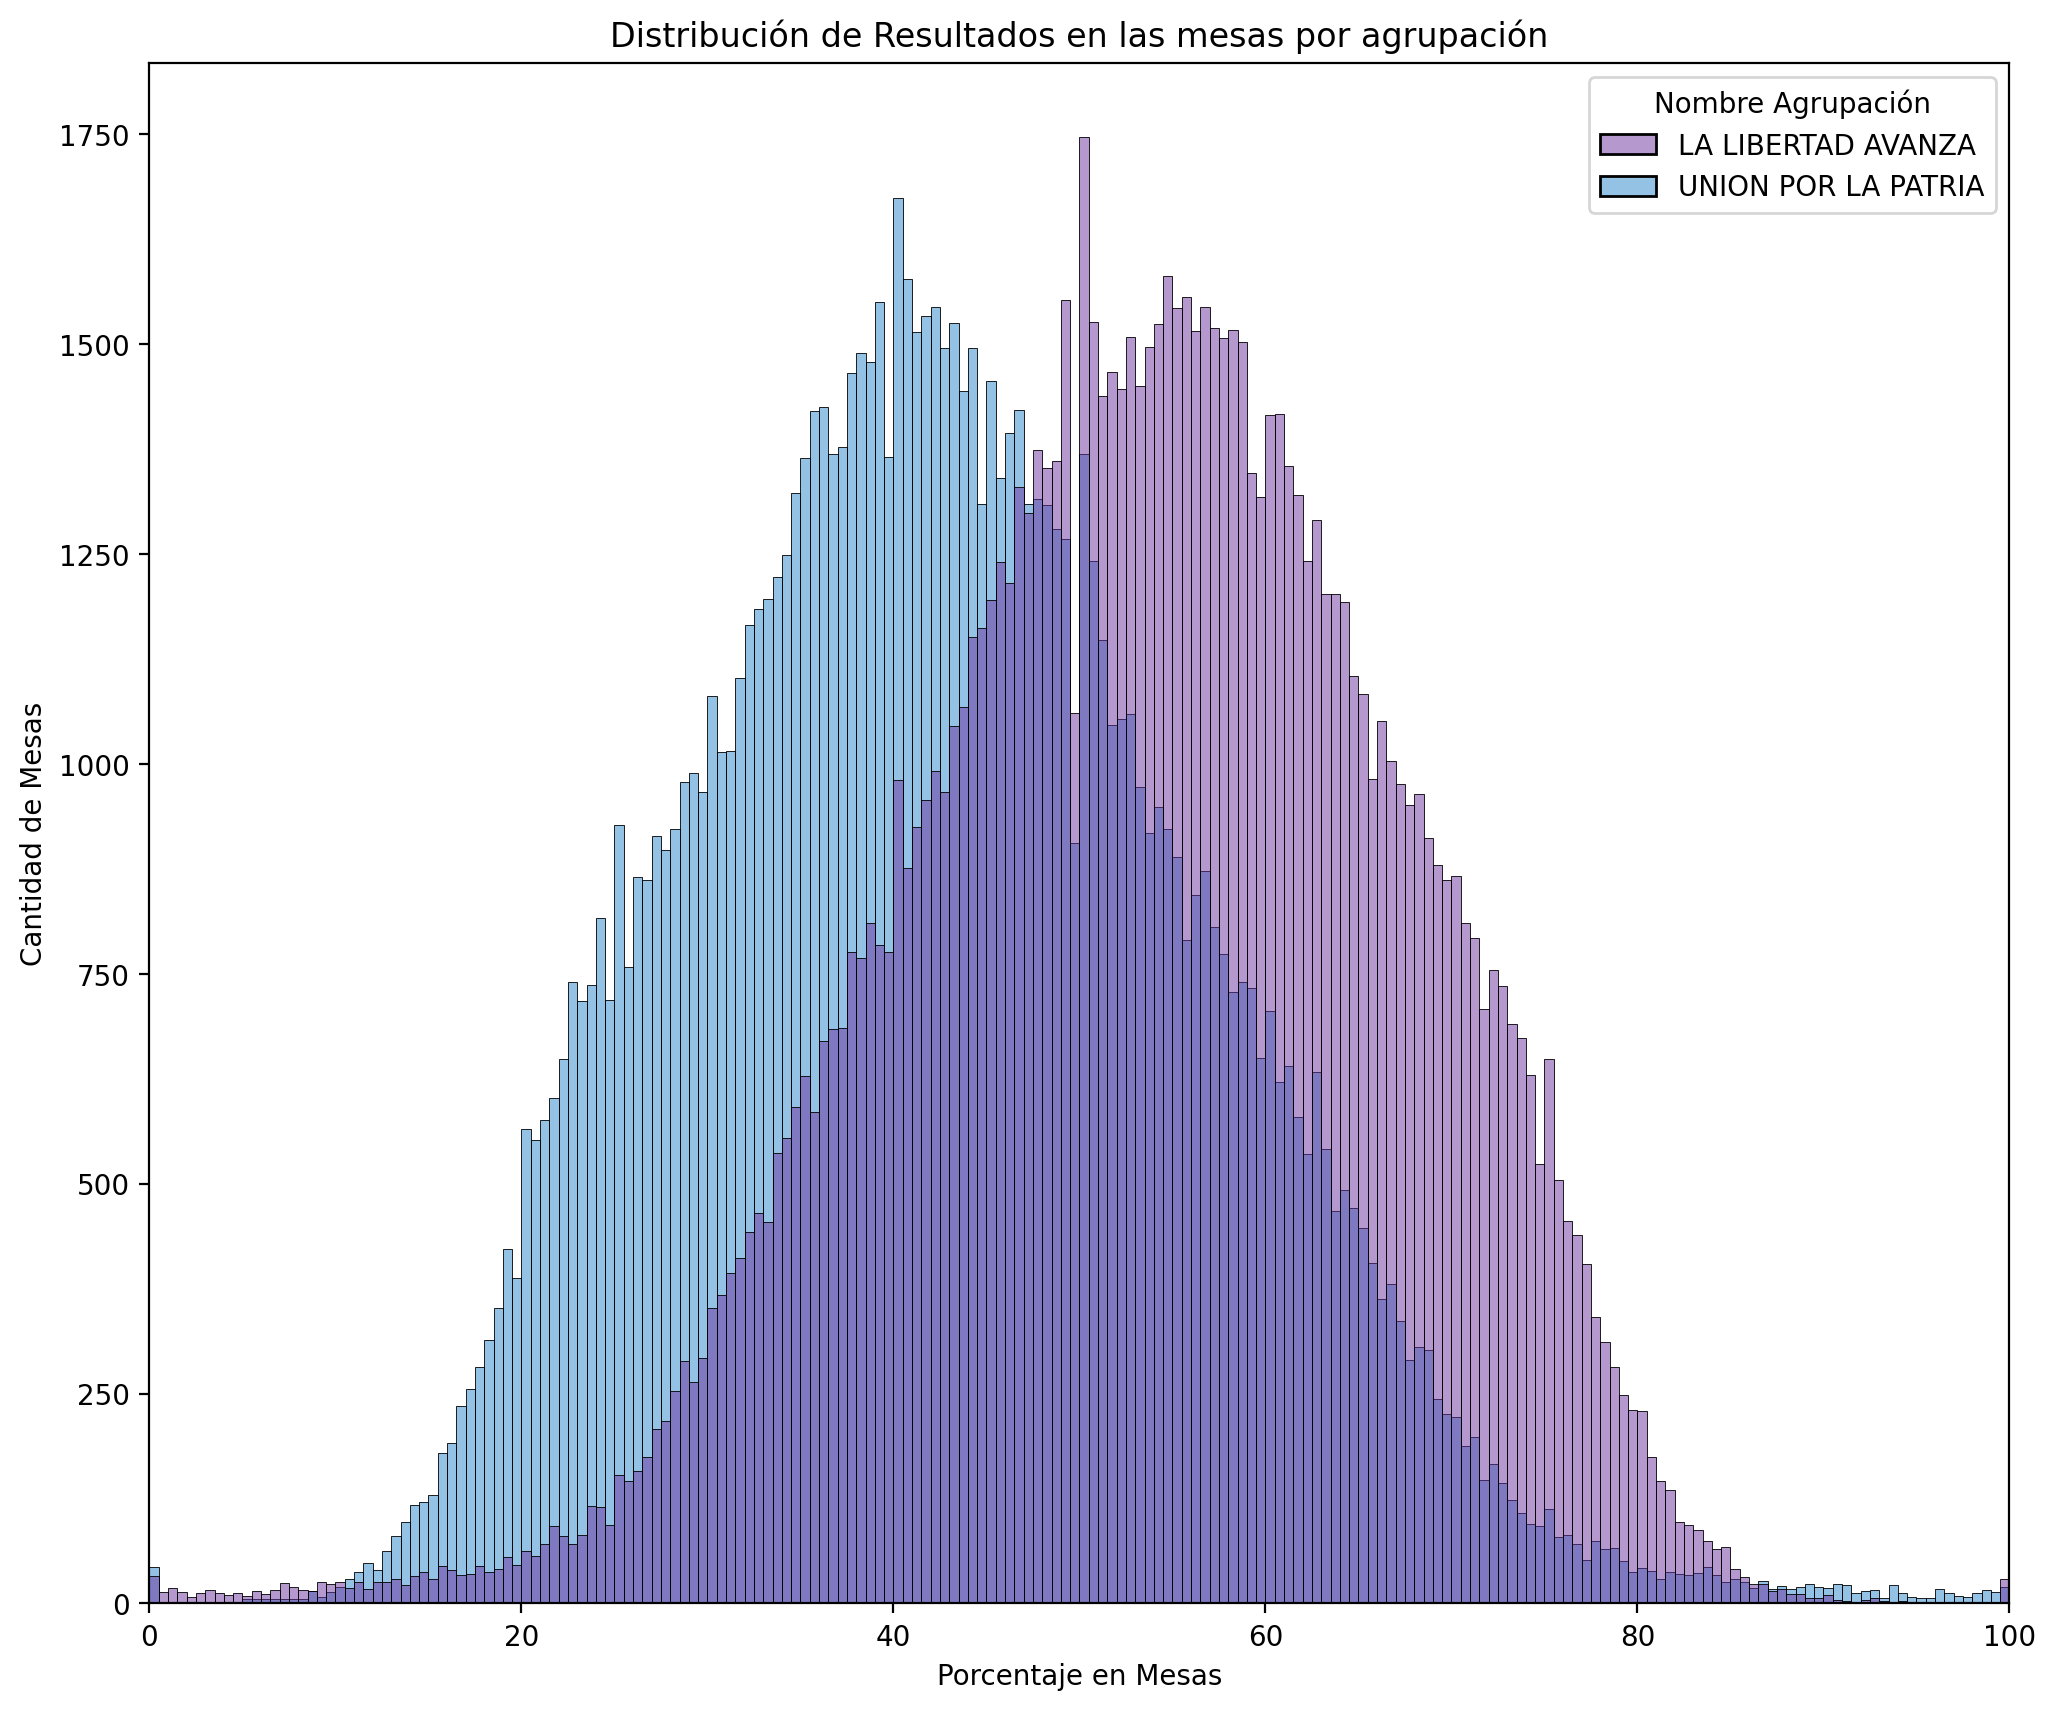

In [34]:
# df_mesas_porcen.groupby('agrupacion_nombre')['votos_porcentaje'].quantile([0.25, 0.75])
# df_mesas_porcen.groupby('agrupacion_nombre')['votos_porcentaje'].std()
custom_palette = sns.color_palette(['#6A329F', '#2986CC'])
plt.figure(figsize=(12, 10))
chart = sns.histplot(df_mesas_porcen, x="votos_porcentaje", bins=200, hue='agrupacion_nombre', palette = custom_palette)
chart.set(xlim=(0, 100))

plt.title('Distribución de Resultados en las mesas por agrupación')
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
legend = plt.gca().get_legend()
legend.set_title('Nombre Agrupación')
plt.savefig('C:/Users/Marcos/Desktop/Balotage/IM1.png')
plt.show()

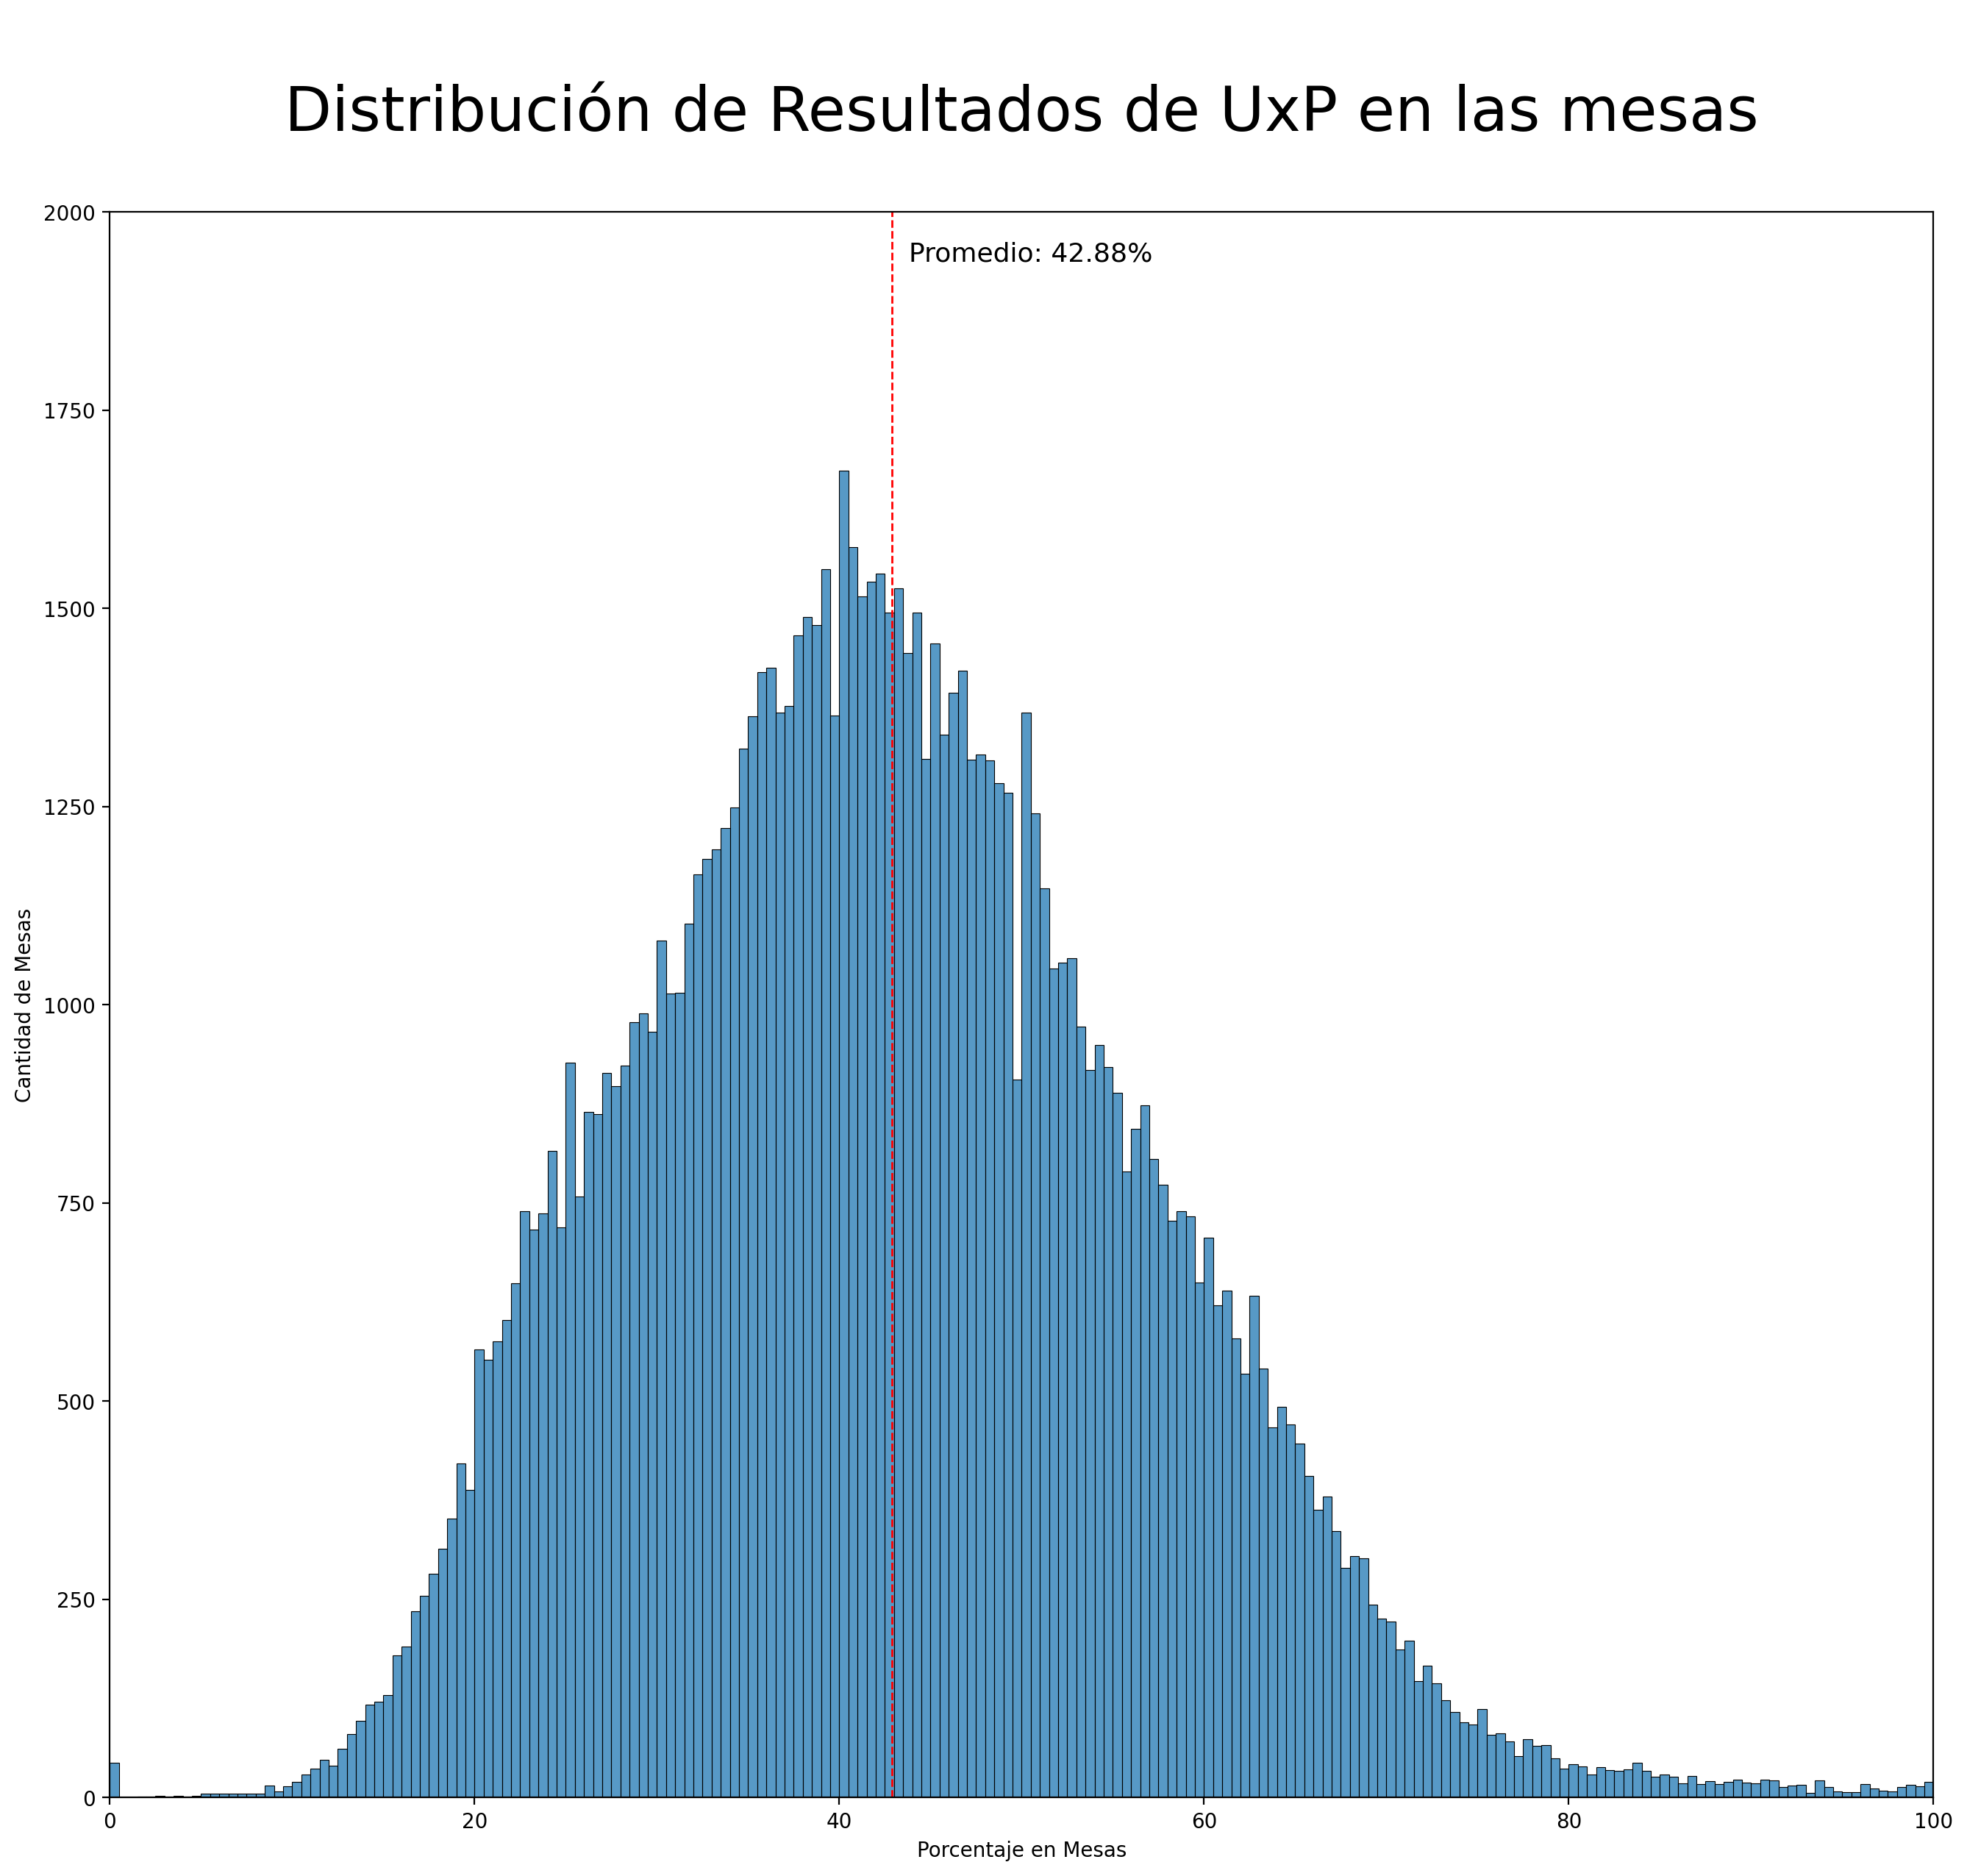

In [37]:
df_mesas_porcen_upp = df_mesas_porcen[df_mesas_porcen['agrupacion_nombre']=='UNION POR LA PATRIA']
promedio = df_mesas_porcen_upp['votos_porcentaje'].mean()

plt.figure(figsize=(16, 14))
chart = sns.histplot(df_mesas_porcen_upp, x="votos_porcentaje", bins=200)
chart.set(xlim=(0, 100))
chart.set_ylim(0,2000)

plt.text(promedio,2000, f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=13, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)

plt.title('\nDistribución de Resultados de UxP en las mesas\n', fontsize=30)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
plt.show()

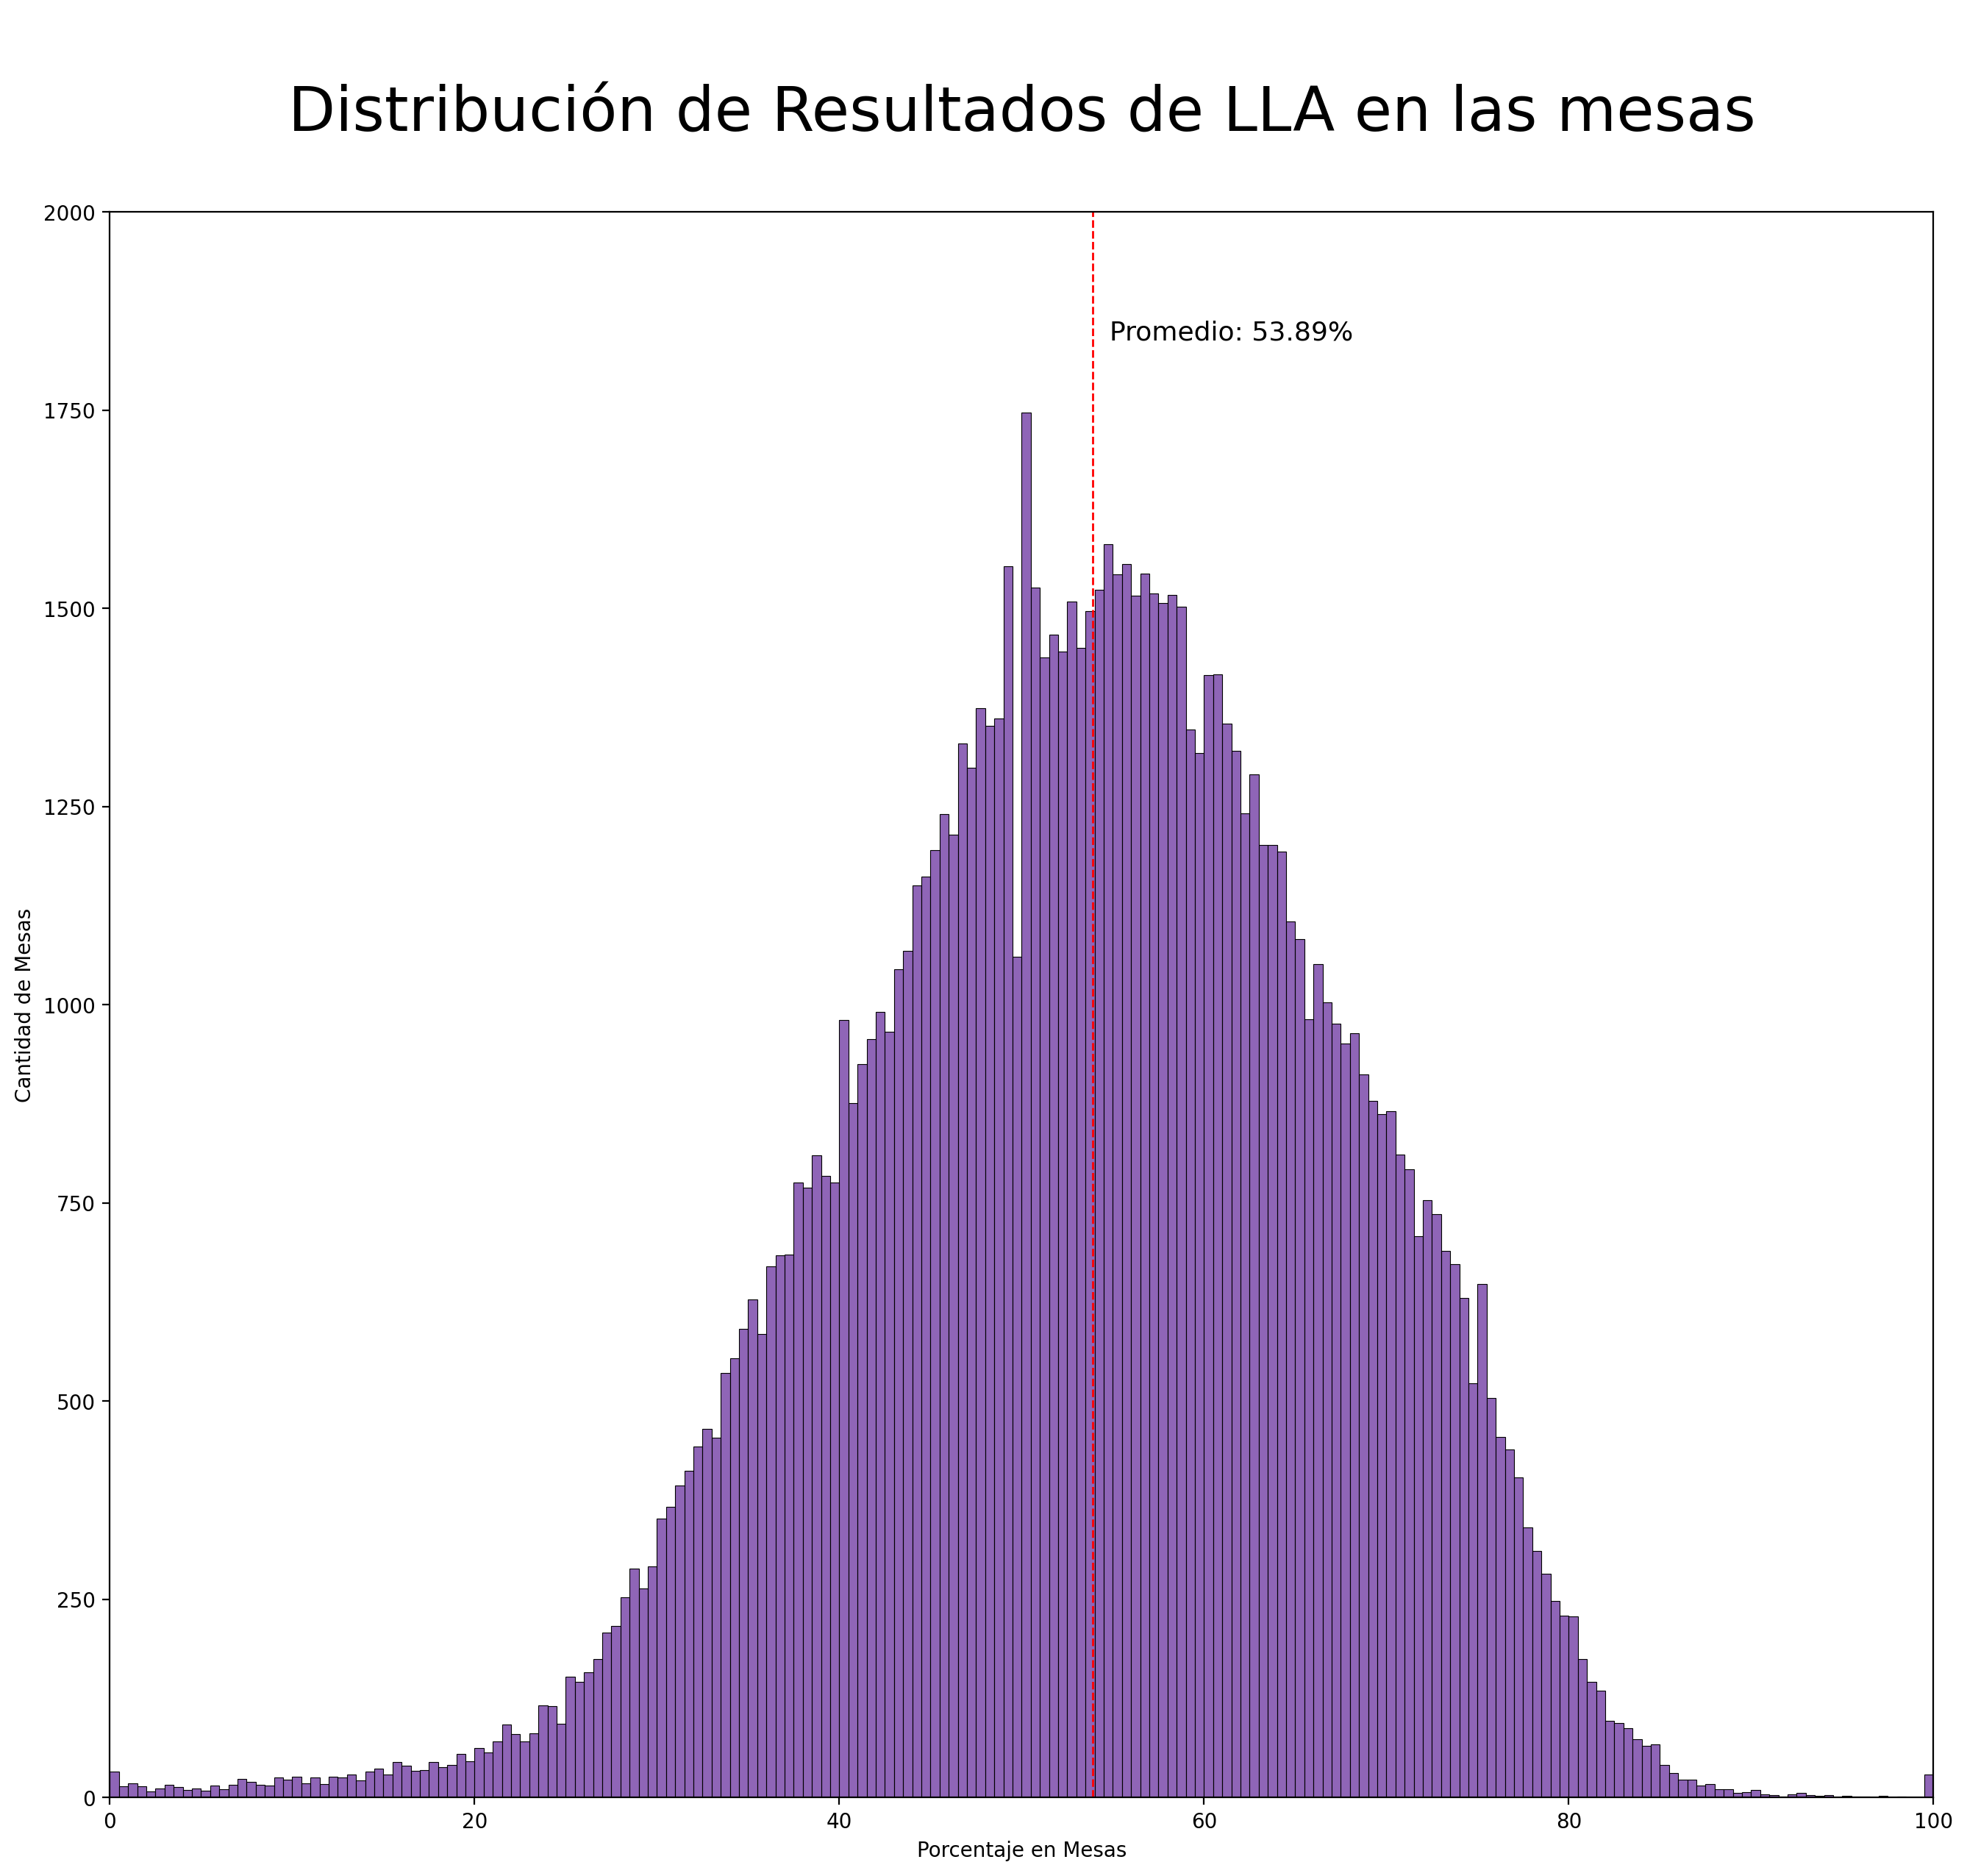

In [40]:
df_mesas_porcen_lla = df_mesas_porcen[df_mesas_porcen['agrupacion_nombre']=='LA LIBERTAD AVANZA']
promedio = df_mesas_porcen_lla['votos_porcentaje'].mean()

plt.figure(figsize=(16, 14))
chart = sns.histplot(df_mesas_porcen_lla, x="votos_porcentaje", bins=200, color='#6A329F')
chart.set(xlim=(0, 100))
chart.set_ylim(0,2000)

plt.text(promedio,1900, f'\n  Promedio: {promedio:.2f}%', color='black', fontsize=13, verticalalignment='top')
plt.axvline(promedio, color='red', linestyle='--',linewidth=1)

plt.title('\nDistribución de Resultados de LLA en las mesas\n', fontsize=30)
plt.xlabel('Porcentaje en Mesas')
plt.ylabel('Cantidad de Mesas')
plt.show()

## Resultados interesantes

<hr>

In [6]:
df_presidente_percen = df_presidente_dep.copy()
df_presidente_percen['votos_porcentaje'] = round(df_presidente_percen.groupby('id_mesa')['votos_cantidad'].transform(lambda x: x / x.sum() * 100),2)

¿Hay alguna mesa donde el ganador obtuvo el 100% de los votos?

In [65]:
df1_mesas_porcen_100 = df_presidente_percen[df_presidente_percen['votos_porcentaje']>=98].sort_values('votos_porcentaje', axis=0, ascending=False)
df1_mesas_porcen_100.sort_values('votos_cantidad', ascending=False).head(10)

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad,votos_porcentaje
615906,Tucumán,23-12-0142A-2652,346,UNION POR LA PATRIA,134.0,POSITIVO,286,100.00
594186,Santiago del Estero,22-22-00183-2107,344,UNION POR LA PATRIA,134.0,POSITIVO,280,98.94
595326,Santiago del Estero,22-24-00201-2297,318,UNION POR LA PATRIA,134.0,POSITIVO,275,98.57
596934,Santiago del Estero,22-5-00042-911,305,UNION POR LA PATRIA,134.0,POSITIVO,273,98.91
515542,San Juan,18-15-00103-1617,344,NaN,NaN,IMPUGNADO,271,99.27
595338,Santiago del Estero,22-24-00201-2299,319,UNION POR LA PATRIA,134.0,POSITIVO,271,98.91
590520,Santiago del Estero,22-10-0089A-1526,348,UNION POR LA PATRIA,134.0,POSITIVO,270,99.26
595362,Santiago del Estero,22-24-00201-2303,319,UNION POR LA PATRIA,134.0,POSITIVO,269,98.90
594276,Santiago del Estero,22-22-00188-2126,346,UNION POR LA PATRIA,134.0,POSITIVO,268,98.89
596940,Santiago del Estero,22-5-00042-912,310,UNION POR LA PATRIA,134.0,POSITIVO,267,98.89


In [70]:
df1_mesas_porcen_100 = df_presidente_percen[(df_presidente_percen['votos_tipo']!='POSITIVO') & (df_presidente_percen['votos_cantidad']>=30)].sort_values('votos_cantidad',ascending=False)
df1_mesas_porcen_100.head(10)

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad,votos_porcentaje
515542,San Juan,18-15-00103-1617,344,NaN,NaN,IMPUGNADO,271,99.27
464450,Misiones,14-16-0080A-2701,345,NaN,NaN,EN BLANCO,115,33.33
230510,Catamarca,3-1-00008-356,350,NaN,NaN,EN BLANCO,111,31.71
386840,Entre Ríos,8-13-00238-2827,349,NaN,NaN,EN BLANCO,108,30.95
196454,Buenos Aires,2-79-0663C-505,352,NaN,NaN,EN BLANCO,99,28.29
464270,Misiones,14-16-00080-2671,350,NaN,NaN,EN BLANCO,98,28.00
228260,Buenos Aires,2-99-00846-62,357,NaN,NaN,EN BLANCO,96,27.20
410366,Jujuy,10-12-0099A-1702,328,NaN,NaN,EN BLANCO,93,28.35
117362,Buenos Aires,2-52-00378-361,350,NaN,NaN,EN BLANCO,93,26.57
67664,Buenos Aires,2-22-00731-63,356,NaN,NaN,EN BLANCO,93,26.35


In [77]:
mesas_ganadas = df_presidente_percen[(df_presidente_percen['votos_tipo']=='POSITIVO')]
mesas_ganadas = mesas_ganadas.loc[mesas_ganadas.groupby('id_mesa')['votos_cantidad'].idxmax()]

LA LIBERTAD AVANZA     69151
UNION POR LA PATRIA    35369
Name: agrupacion_nombre, dtype: int64

In [82]:
mesas_ganadas = mesas_ganadas['agrupacion_nombre'].value_counts().reset_index()
mesas_ganadas['agrupacion_nombre'] =  round(mesas_ganadas['agrupacion_nombre']/(mesas_ganadas['agrupacion_nombre'].sum())*100,2)
mesas_ganadas

,index,agrupacion_nombre
0,LA LIBERTAD AVANZA,66.16
1,UNION POR LA PATRIA,33.84


In [76]:
# Comparar mesas 100% con las de las generales
df_presidente_dep[df_presidente_dep['id_mesa']=='1-1-1-13']

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad
260994,Ciudad Autónoma de Buenos Aires,1-1-1-13,344,LA LIBERTAD AVANZA,135.0,POSITIVO,118
260995,Ciudad Autónoma de Buenos Aires,1-1-1-13,344,UNION POR LA PATRIA,134.0,POSITIVO,113
260996,Ciudad Autónoma de Buenos Aires,1-1-1-13,344,NaN,NaN,EN BLANCO,2
260997,Ciudad Autónoma de Buenos Aires,1-1-1-13,344,NaN,NaN,NULO,11
260998,Ciudad Autónoma de Buenos Aires,1-1-1-13,344,NaN,NaN,IMPUGNADO,0
260999,Ciudad Autónoma de Buenos Aires,1-1-1-13,344,NaN,NaN,RECURRIDO,0


Podemos observar que hay varias mesas donde una agrupación obtuvo el 100% de los votos, pero algunas de esas mesas tienen muy pocos votos, por lo que la probabilidad de que una sola agrupación obtenga todos los votos es alta. Entonces, filtremos las mesas que tienen muchos votos en lugar de solo unas pocas.

In [54]:
df1_mesas_porcen_100 = df1_mesas_porcen_100[df1_mesas_porcen_100['votos_cantidad']>20]
df1_mesas_porcen_100.sort_values('votos_cantidad', ascending=False)

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad,votos_porcentaje
615906,Tucumán,23-12-0142A-2652,346,UNION POR LA PATRIA,134.00,POSITIVO,286,100.00
592752,Santiago del Estero,22-18-00159-1930,276,UNION POR LA PATRIA,134.00,POSITIVO,266,100.00
592158,Santiago del Estero,22-16-0139B-1772,197,UNION POR LA PATRIA,134.00,POSITIVO,169,100.00
508794,Salta,17-7-0036B-3203,348,UNION POR LA PATRIA,134.00,POSITIVO,152,100.00
477816,Neuquén,15-13-01340-1490,76,UNION POR LA PATRIA,134.00,POSITIVO,44,100.00
108594,Buenos Aires,2-50-00370-1490,124,UNION POR LA PATRIA,134.00,POSITIVO,39,100.00
49620,Buenos Aires,2-13-00126-79,43,LA LIBERTAD AVANZA,135.00,POSITIVO,26,100.00


Curiosamente, no solo podemos observar que 6 de las 7 mesas donde el ganador obtuvo el 100% de los votos pertenecen a UNION POR LA PATRIA, sino que en las que el ganador tuvo una cantidad muy grande de votos, el ganador fue UNION POR LA PATRIA

In [55]:
df1_mesas_porcen_100.value_counts(['agrupacion_nombre'])

agrupacion_nombre  
UNION POR LA PATRIA    6
LA LIBERTAD AVANZA     1
dtype: int64

<HR>

¿Y qué hay acerca de las mesas donde el ganador obtuvo el 90% o más de los votos?

In [14]:
df1_mesas_porcen_90 = df_presidente_percen[df_presidente_percen['votos_porcentaje']>=90].sort_values('votos_porcentaje', axis=0, ascending=False)
df1_mesas_porcen_90 = df1_mesas_porcen_90[df1_mesas_porcen_90['votos_cantidad']>20]
df1_mesas_porcen_90.value_counts(['agrupacion_nombre'])

agrupacion_nombre  
UNION POR LA PATRIA    270
LA LIBERTAD AVANZA      36
dtype: int64

In [15]:
df1_mesas_porcen_90.value_counts(['distrito_nombre'])

distrito_nombre    
Santiago del Estero    201
Salta                   27
Buenos Aires            14
Córdoba                 14
Tucumán                 10
Santa Fe                 9
Formosa                  7
Entre Ríos               6
Chaco                    5
Catamarca                4
Neuquén                  4
San Luis                 3
La Rioja                 2
San Juan                 1
dtype: int64

In [60]:
mesas = df1_mesas_porcen_90[df1_mesas_porcen_90['distrito_nombre']=='Santiago del Estero']['id_mesa'].tolist()
mesas_santiago = df_presidente_dep[df_presidente_dep['id_mesa'].isin(mesas)]
mesas_santiago = mesas_santiago[mesas_santiago['votos_tipo']=='POSITIVO']
filtro_cantidad_votos1 = mesas_santiago.groupby('id_mesa')['votos_cantidad'].sum().reset_index()
filtro_cantidad_votos1 = filtro_cantidad_votos1[filtro_cantidad_votos1['votos_cantidad']>=100]
mesas2 = filtro_cantidad_votos1['id_mesa'].tolist()
mesas_santiago2 = mesas_santiago[mesas_santiago['id_mesa'].isin(mesas2)]


mask = (mesas_santiago2['agrupacion_nombre'] == 'LA LIBERTAD AVANZA') & (mesas_santiago2['votos_cantidad'] <= 10)
mesas_santiago3 = mesas_santiago2[mesas_santiago2['id_mesa'].isin(mesas_santiago2[mask]['id_mesa'].tolist())]
mesas_santiago3 = mesas_santiago3.sort_values('votos_cantidad',ascending=False)
mesas_santiago3

,distrito_nombre,id_mesa,mesa_electores,agrupacion_nombre,agrupacion_id,votos_tipo,votos_cantidad
596484,Santiago del Estero,22-4-00032-835,332,UNION POR LA PATRIA,134.0,POSITIVO,319
594186,Santiago del Estero,22-22-00183-2107,344,UNION POR LA PATRIA,134.0,POSITIVO,280
595326,Santiago del Estero,22-24-00201-2297,318,UNION POR LA PATRIA,134.0,POSITIVO,275
596934,Santiago del Estero,22-5-00042-911,305,UNION POR LA PATRIA,134.0,POSITIVO,273
595338,Santiago del Estero,22-24-00201-2299,319,UNION POR LA PATRIA,134.0,POSITIVO,271
...,...,...,...,...,...,...,...
587191,Santiago del Estero,22-1-00012-720,296,LA LIBERTAD AVANZA,135.0,POSITIVO,1
599167,Santiago del Estero,22-6-00060-1284,210,LA LIBERTAD AVANZA,135.0,POSITIVO,0
592753,Santiago del Estero,22-18-00159-1930,276,LA LIBERTAD AVANZA,135.0,POSITIVO,0
599161,Santiago del Estero,22-6-00060-1283,207,LA LIBERTAD AVANZA,135.0,POSITIVO,0


<HR>

¿Y qué hay acerca de las mesas donde el ganador obtuvo el 80% o más de los votos?

In [58]:
df1_mesas_porcen_80 = df_presidente_percen[df_presidente_percen['votos_porcentaje']>=80].sort_values('votos_porcentaje', axis=0, ascending=False)
df1_mesas_porcen_80 = df1_mesas_porcen_80[df1_mesas_porcen_80['votos_cantidad']>20]
df1_mesas_porcen_80.value_counts(['agrupacion_nombre'])

agrupacion_nombre  
LA LIBERTAD AVANZA     1361
UNION POR LA PATRIA     840
dtype: int64

In [59]:
df1_mesas_porcen_80.value_counts(['distrito_nombre'])

distrito_nombre                                      
Córdoba                                                  752
Santiago del Estero                                      479
Santa Fe                                                 161
Buenos Aires                                             120
Ciudad Autónoma de Buenos Aires                          108
Mendoza                                                   96
Entre Ríos                                                76
Tucumán                                                   73
Salta                                                     72
Corrientes                                                62
Formosa                                                   60
Chaco                                                     39
La Rioja                                                  22
San Juan                                                  21
Neuquén                                                   17
Catamarca                      

<hr>

¿Y qué hay acerca de las mesas donde el ganador obtuvo el 60% o más de los votos?

In [61]:
df1_mesas_porcen_50 = df_presidente_percen[df_presidente_percen['votos_porcentaje']>=60].sort_values('votos_porcentaje', axis=0, ascending=False)
df1_mesas_porcen_50 = df1_mesas_porcen_50[df1_mesas_porcen_50['votos_cantidad']>20]
df1_mesas_porcen_50.value_counts(['agrupacion_nombre'])

agrupacion_nombre  
LA LIBERTAD AVANZA     34741
UNION POR LA PATRIA    11949
dtype: int64

<hr>

<hr>

<hr>